<a href="https://colab.research.google.com/github/abuqaiselegant/BreastCancerPrediction_ML_Coursework/blob/main/ML_assignment2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import data & Variable definition

In [125]:
# Ignore scikit warning output

import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)

import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)


In [126]:
## Data Import & replace missing data 

import pandas as pd
import numpy as np

# Insert a dataframe object from excel file
df = pd.DataFrame(pd.read_excel("TrainDataset2024.xls"))
# Drop not used column (prevent model using ID to predict)
df = df.drop("ID", axis=1)

# Change missing values to NaN (mostly for clinical features)
df.replace(999, np.nan, inplace=True)

df.head()

pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  HER2  \
0            1.0                          144.0  41.0   0  0.0   0.0   
1            0.0                          142.0  39.0   1  1.0   0.0   
2            1.0                          135.0  31.0   0  0.0   0.0   
3            0.0                           12.0  35.0   0  0.0   0.0   
4            0.0                          109.0  61.0   1  0.0   0.0   

   TrippleNegative  ChemoGrade  Proliferation  HistologyType  ...  \
0              1.0         3.0            3.0            1.0  ...   
1              0.0         3.0            3.0            1.0  ...   
2              1.0         2.0            1.0            1.0  ...   
3              1.0         3.0            3.0            1.0  ...   
4              0.0         2.0            1.0            1.0  ...   

   original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                       0.517172   
1                                       0.444391   
2                                       0.534549   
3                                       0.506185   
4                                       0.462282   

   original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                      0.375126                    3.325332   
1                                      0.444391                    3.032144   
2                                      0.534549                    2.485848   
3                                      0.506185                    2.606255   
4                                      0.462282                    2.809279   

   original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                       0.002314                  3880771.500   
1                       0.005612                  2372009.744   
2                       0.006752                  1540027.421   
3                       0.003755                  6936740.794   
4                       0.006521                  1265399.054   

   original_ngtdm_Busyness  original_ngtdm_Coarseness  \
0               473.464852                   0.000768   
1                59.459710                   0.004383   
2                33.935384                   0.007584   
3                46.859265                   0.005424   
4                39.621023                   0.006585   

   original_ngtdm_Complexity  original_ngtdm_Contrast  original_ngtdm_Strength  
0                   0.182615                 0.030508                 0.000758  
1                   0.032012                 0.001006                 0.003685  
2                   0.024062                 0.000529                 0.006447  
3                   0.013707                 0.000178                 0.004543  
4                   0.034148                 0.001083                 0.005626  

[5 rows x 120 columns]

In [127]:
# declare sets of column namefor future use

# Define output column name
clf_output_column_name = "pCR (outcome)"
reg_output_column_name = "RelapseFreeSurvival (outcome)"

# Define feature column names
features = list(df.columns.copy())
if clf_output_column_name in features:
    features.remove(clf_output_column_name)
if reg_output_column_name in features:
    features.remove(reg_output_column_name)
print(f'features({len(features)}):{features}')

# Define set of clinical feature column name
clinical_features = [
    "Age",
    "ER",
    "PgR",
    "HER2",
    "TrippleNegative",
    "ChemoGrade",
    "Proliferation",
    "HistologyType",
    "LNStatus",
    "TumourStage",
    "Gene",
]
print(f"clinical features({len(clinical_features)}): {clinical_features}")

# Define set of MRI feature column name
MRI_features = [
    "original_shape_Elongation",
    "original_shape_Flatness",
    "original_shape_LeastAxisLength",
    "original_shape_MajorAxisLength",
    "original_shape_Maximum2DDiameterColumn",
    "original_shape_Maximum2DDiameterRow",
    "original_shape_Maximum2DDiameterSlice",
    "original_shape_Maximum3DDiameter",
    "original_shape_MeshVolume",
    "original_shape_MinorAxisLength",
    "original_shape_Sphericity",
    "original_shape_SurfaceArea",
    "original_shape_SurfaceVolumeRatio",
    "original_shape_VoxelVolume",
    "original_firstorder_10Percentile",
    "original_firstorder_90Percentile",
    "original_firstorder_Energy",
    "original_firstorder_Entropy",
    "original_firstorder_InterquartileRange",
    "original_firstorder_Kurtosis",
    "original_firstorder_Maximum",
    "original_firstorder_MeanAbsoluteDeviation",
    "original_firstorder_Mean",
    "original_firstorder_Median",
    "original_firstorder_Minimum",
    "original_firstorder_Range",
    "original_firstorder_RobustMeanAbsoluteDeviation",
    "original_firstorder_RootMeanSquared",
    "original_firstorder_Skewness",
    "original_firstorder_TotalEnergy",
    "original_firstorder_Uniformity",
    "original_firstorder_Variance",
    "original_glcm_Autocorrelation",
    "original_glcm_ClusterProminence",
    "original_glcm_ClusterShade",
    "original_glcm_ClusterTendency",
    "original_glcm_Contrast",
    "original_glcm_Correlation",
    "original_glcm_DifferenceAverage",
    "original_glcm_DifferenceEntropy",
    "original_glcm_DifferenceVariance",
    "original_glcm_Id",
    "original_glcm_Idm",
    "original_glcm_Idmn",
    "original_glcm_Idn",
    "original_glcm_Imc1",
    "original_glcm_Imc2",
    "original_glcm_InverseVariance",
    "original_glcm_JointAverage",
    "original_glcm_JointEnergy",
    "original_glcm_JointEntropy",
    "original_glcm_MCC",
    "original_glcm_MaximumProbability",
    "original_glcm_SumAverage",
    "original_glcm_SumEntropy",
    "original_glcm_SumSquares",
    "original_gldm_DependenceEntropy",
    "original_gldm_DependenceNonUniformity",
    "original_gldm_DependenceNonUniformityNormalized",
    "original_gldm_DependenceVariance",
    "original_gldm_GrayLevelNonUniformity",
    "original_gldm_GrayLevelVariance",
    "original_gldm_HighGrayLevelEmphasis",
    "original_gldm_LargeDependenceEmphasis",
    "original_gldm_LargeDependenceHighGrayLevelEmphasis",
    "original_gldm_LargeDependenceLowGrayLevelEmphasis",
    "original_gldm_LowGrayLevelEmphasis",
    "original_gldm_SmallDependenceEmphasis",
    "original_gldm_SmallDependenceHighGrayLevelEmphasis",
    "original_gldm_SmallDependenceLowGrayLevelEmphasis",
    "original_glrlm_GrayLevelNonUniformity",
    "original_glrlm_GrayLevelNonUniformityNormalized",
    "original_glrlm_GrayLevelVariance",
    "original_glrlm_HighGrayLevelRunEmphasis",
    "original_glrlm_LongRunEmphasis",
    "original_glrlm_LongRunHighGrayLevelEmphasis",
    "original_glrlm_LongRunLowGrayLevelEmphasis",
    "original_glrlm_LowGrayLevelRunEmphasis",
    "original_glrlm_RunEntropy",
    "original_glrlm_RunLengthNonUniformity",
    "original_glrlm_RunLengthNonUniformityNormalized",
    "original_glrlm_RunPercentage",
    "original_glrlm_RunVariance",
    "original_glrlm_ShortRunEmphasis",
    "original_glrlm_ShortRunHighGrayLevelEmphasis",
    "original_glrlm_ShortRunLowGrayLevelEmphasis",
    "original_glszm_GrayLevelNonUniformity",
    "original_glszm_GrayLevelNonUniformityNormalized",
    "original_glszm_GrayLevelVariance",
    "original_glszm_HighGrayLevelZoneEmphasis",
    "original_glszm_LargeAreaEmphasis",
    "original_glszm_LargeAreaHighGrayLevelEmphasis",
    "original_glszm_LargeAreaLowGrayLevelEmphasis",
    "original_glszm_LowGrayLevelZoneEmphasis",
    "original_glszm_SizeZoneNonUniformity",
    "original_glszm_SizeZoneNonUniformityNormalized",
    "original_glszm_SmallAreaEmphasis",
    "original_glszm_SmallAreaHighGrayLevelEmphasis",
    "original_glszm_SmallAreaLowGrayLevelEmphasis",
    "original_glszm_ZoneEntropy",
    "original_glszm_ZonePercentage",
    "original_glszm_ZoneVariance",
    "original_ngtdm_Busyness",
    "original_ngtdm_Coarseness",
    "original_ngtdm_Complexity",
    "original_ngtdm_Contrast",
    "original_ngtdm_Strength",
]
print(f"MRI features({len(MRI_features)}): {MRI_features}")

# Create a MRI feature group dictionary
MRI_group_dict: dict[str, list[str]] = {}

for feature in MRI_features:
    split_f = feature.split("_")

    key = "_".join([split_f[0], split_f[1]])

    if not MRI_group_dict.get(key):
        MRI_group_dict[key] = [feature]
    else:
        MRI_group_dict[key].append(feature)

for k, v in MRI_group_dict.items():
    print(f"{k}({len(v)}): {v}")

# Define group of feature base on data type (continuous and categorical)
features_continuous = ["Age"] + MRI_features
features_categorical = list(set(features) - set(features_continuous))

print(f"continuous({len(features_continuous)}): {features_continuous}")
print(f"categorical({len(features_categorical)}): {features_categorical}")

features(118):['Age', 'ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus', 'TumourStage', 'Gene', 'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_fi

# 2. Exploratory Data Analysis

In [129]:
## Create Train/test sets for 5 folds  

from sklearn.model_selection import KFold

# Simulate training set from Nested K-fold crossvalidation first fold
df_exp = df.copy()
kf = KFold(n_splits=5, shuffle=True, random_state=1)

for train_index, test_index in kf.split(df_exp):
    df_exp = df_exp.iloc[train_index]
    break

df_exp.head()

pCR (outcome)  RelapseFreeSurvival (outcome)   Age  ER  PgR  HER2  \
0            1.0                          144.0  41.0   0  0.0   0.0   
1            0.0                          142.0  39.0   1  1.0   0.0   
2            1.0                          135.0  31.0   0  0.0   0.0   
3            0.0                           12.0  35.0   0  0.0   0.0   
7            0.0                           17.0  41.0   0  0.0   0.0   

   TrippleNegative  ChemoGrade  Proliferation  HistologyType  ...  \
0              1.0         3.0            3.0            1.0  ...   
1              0.0         3.0            3.0            1.0  ...   
2              1.0         2.0            1.0            1.0  ...   
3              1.0         3.0            3.0            1.0  ...   
7              1.0         3.0            2.0            1.0  ...   

   original_glszm_SmallAreaHighGrayLevelEmphasis  \
0                                       0.517172   
1                                       0.444391   
2                                       0.534549   
3                                       0.506185   
7                                       0.476326   

   original_glszm_SmallAreaLowGrayLevelEmphasis  original_glszm_ZoneEntropy  \
0                                      0.375126                    3.325332   
1                                      0.444391                    3.032144   
2                                      0.534549                    2.485848   
3                                      0.506185                    2.606255   
7                                      0.476326                    3.099632   

   original_glszm_ZonePercentage  original_glszm_ZoneVariance  \
0                       0.002314                  3880771.500   
1                       0.005612                  2372009.744   
2                       0.006752                  1540027.421   
3                       0.003755                  6936740.794   
7                       0.008650                  1032117.399   

   original_ngtdm_Busyness  original_ngtdm_Coarseness  \
0               473.464852                   0.000768   
1                59.459710                   0.004383   
2                33.935384                   0.007584   
3                46.859265                   0.005424   
7                96.947959                   0.002821   

   original_ngtdm_Complexity  original_ngtdm_Contrast  original_ngtdm_Strength  
0                   0.182615                 0.030508                 0.000758  
1                   0.032012                 0.001006                 0.003685  
2                   0.024062                 0.000529                 0.006447  
3                   0.013707                 0.000178                 0.004543  
7                   0.069697                 0.004285                 0.002475  

[5 rows x 120 columns]

<Axes: xlabel='pCR (outcome)', ylabel='count'>

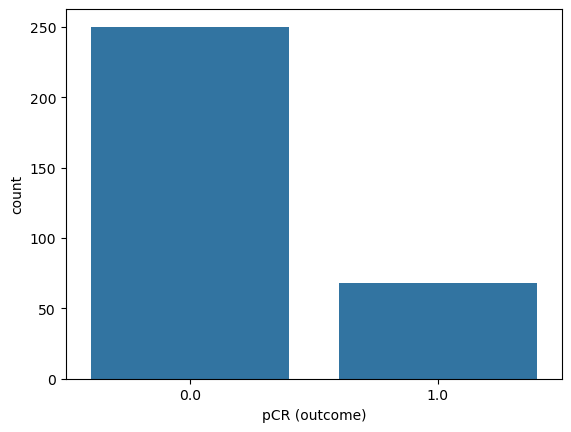

In [130]:
import seaborn as sns

sns.countplot(x=clf_output_column_name, data=df_exp)

<Axes: xlabel='RFS (in months)', ylabel='Frequency'>

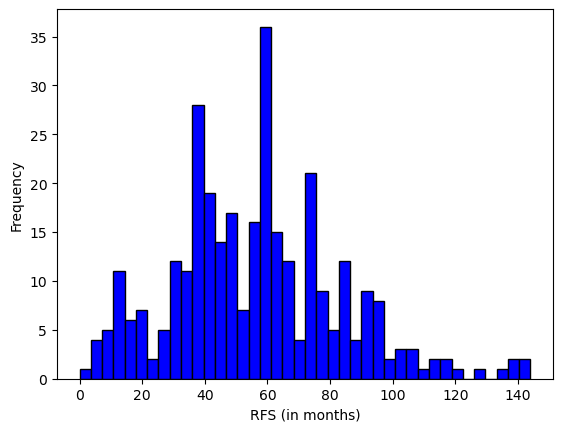

In [131]:
df_exp[reg_output_column_name].plot(xlabel="RFS (in months)", kind="hist", color="blue", edgecolor="black", bins=40)

In [132]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

df_exp = df_exp.copy()

# change missing values to NaN (mostly for clinical features)
df_exp.replace(999, np.nan, inplace=True)

# drop rows with Nan in clf output
df_exp = df_exp.dropna(subset=[clf_output_column_name])

# Turn MRI features outliers into Nan
for feature in MRI_features:
    Q1 = df_exp[feature].quantile(0.25)
    Q3 = df_exp[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Set outliers as NaN
    df_exp[feature] = np.where(
        (df_exp[feature] < lower_bound) | (df_exp[feature] > upper_bound),
        np.nan,
        df_exp[feature],
    )


# replace NaN in columns with column's median except Gene -> TODO: should binary data use most frequent or knn?
df_exp_prep = df_exp.copy()
imputer = SimpleImputer(strategy="median")
df_exp_prep[features_continuous] = imputer.fit_transform(df_exp_prep[features_continuous])


# impute NaN with KNN
knn_imputer = KNNImputer()
data_exp = knn_imputer.fit_transform(df_exp_prep)

df_exp_prep = pd.DataFrame(data_exp, columns=df_exp_prep.columns)

# make it integer
df_exp_prep[features_categorical] = df_exp_prep[features_categorical].round()

# # Check if there are still any missing values
# print("Remaining missing values after imputation:")
# print(df_exp_prep.isnull().sum())
# pd.set_option("display.max_rows", 200)

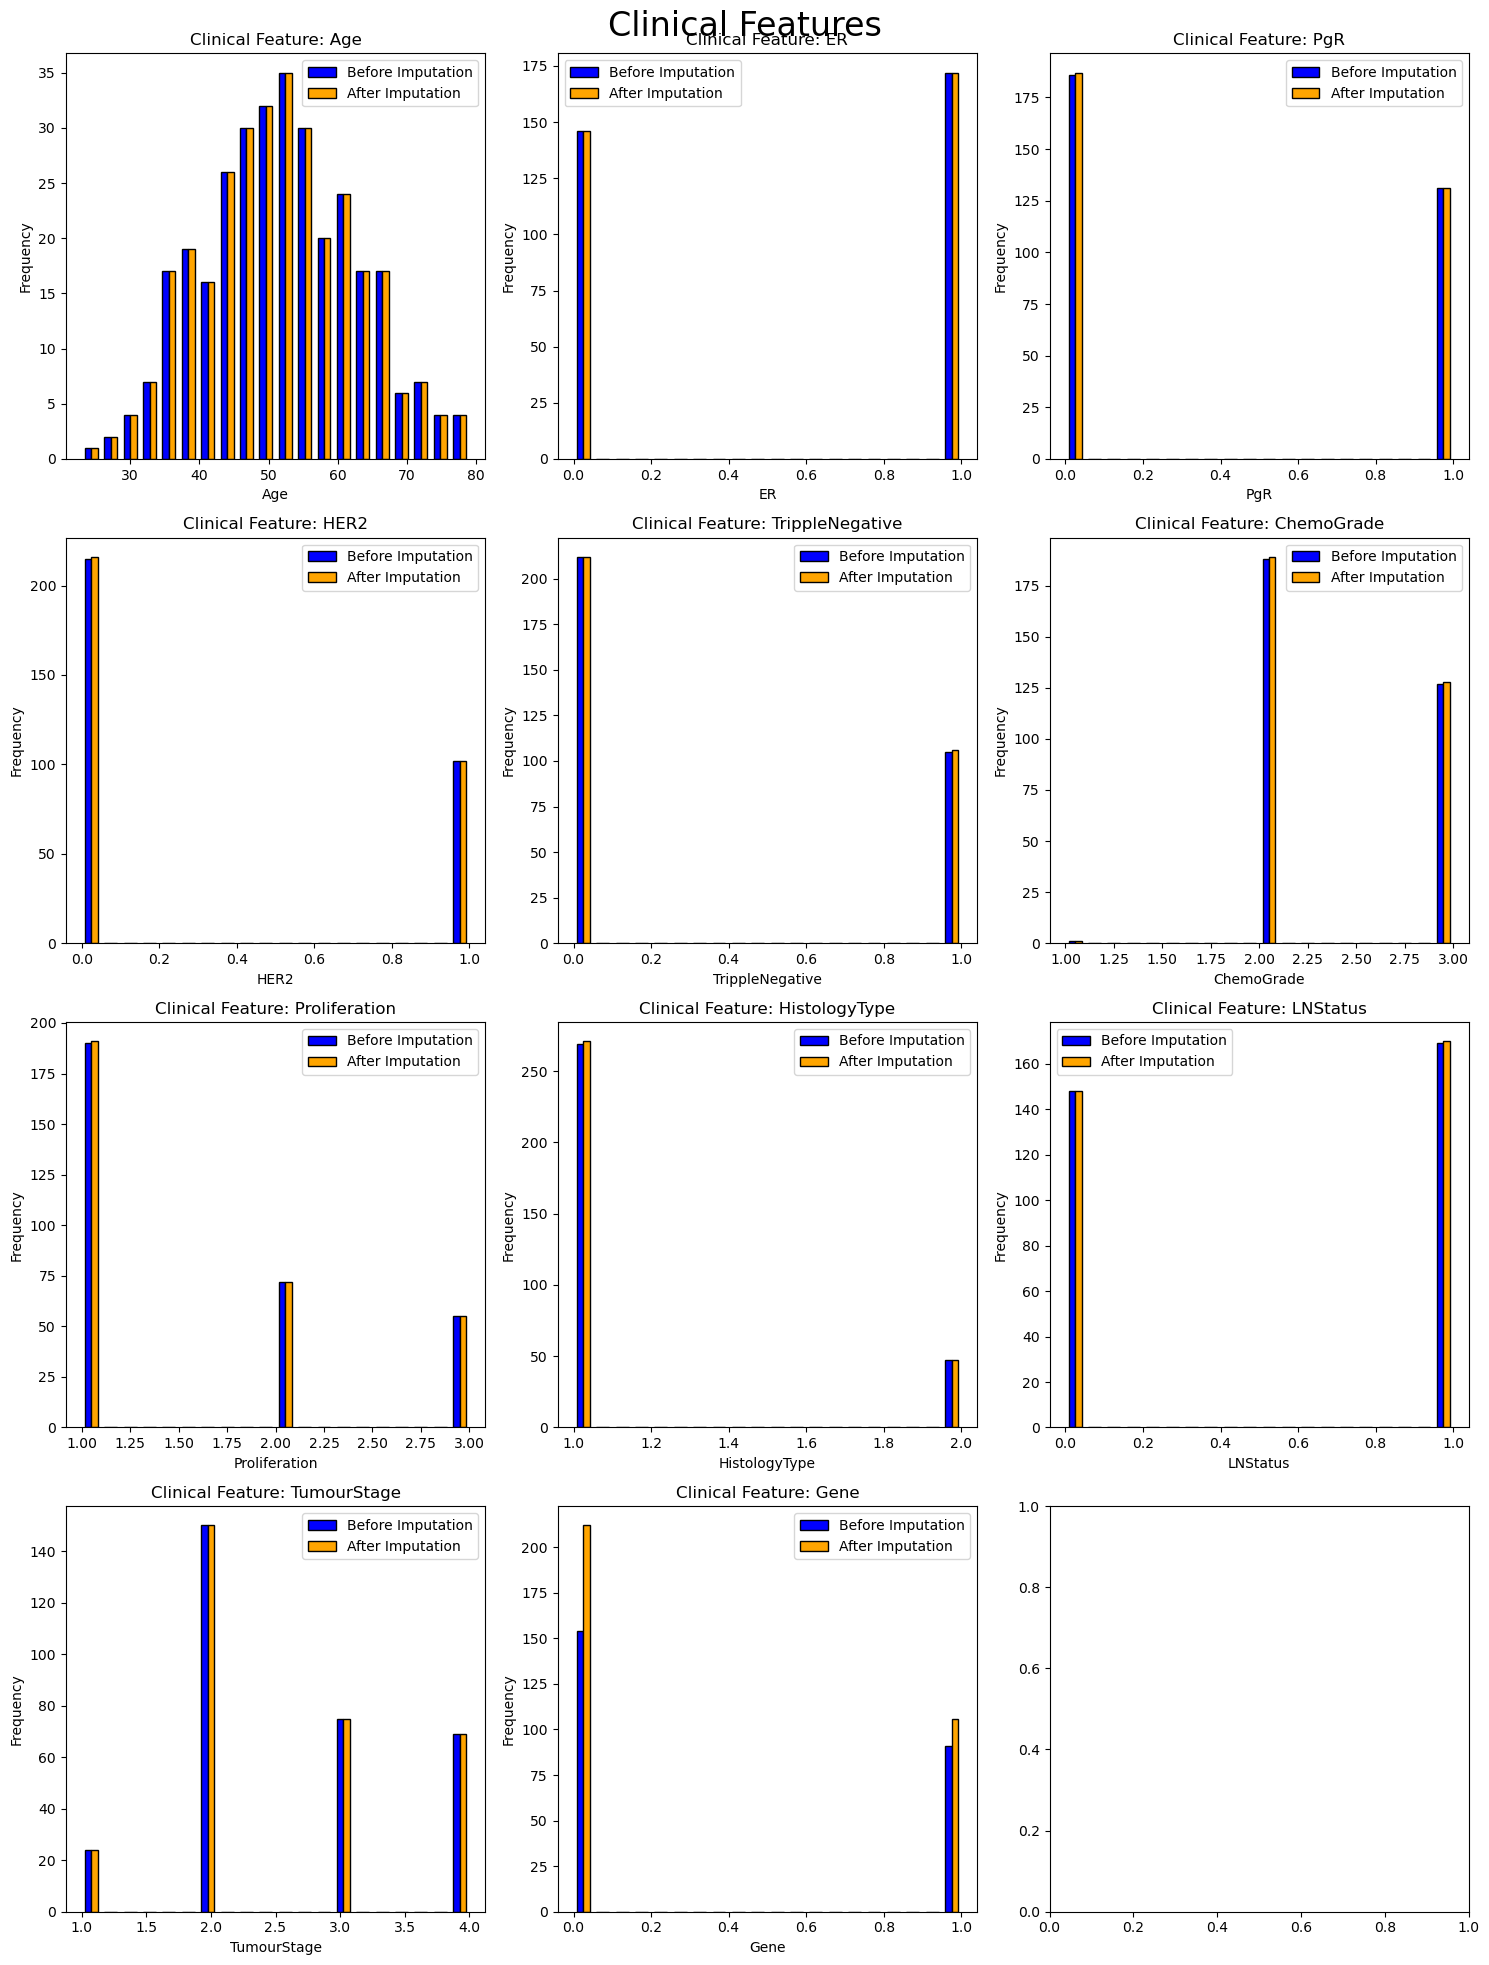

In [133]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for i, feature in enumerate(clinical_features):
  ax = axes[i]

  # Define bins and compute histogram values
  bins = np.histogram_bin_edges(df_exp[feature].dropna(), bins=20)
  before_hist, _ = np.histogram(df_exp[feature], bins=bins)
  after_hist, _ = np.histogram(df_exp_prep[feature].fillna(0), bins=bins)

  # Create positions for side-by-side bars
  bin_centers = (bins[:-1] + bins[1:]) / 2
  bar_width = (bins[1] - bins[0]) / 3

  # Plot the histograms side by side
  ax.bar(bin_centers - bar_width / 2, before_hist, width=bar_width, label="Before Imputation", color='blue', edgecolor='black')
  ax.bar(bin_centers + bar_width / 2, after_hist, width=bar_width, label="After Imputation", color='orange', edgecolor='black')
  ax.set_xlabel(feature)
  ax.set_ylabel("Frequency")

  ax.set_title(f"Clinical Feature: {feature}")
  ax.legend()

fig.suptitle(f"Clinical Features", fontsize=24)
fig.subplots_adjust(bottom=0.5)

plt.tight_layout()

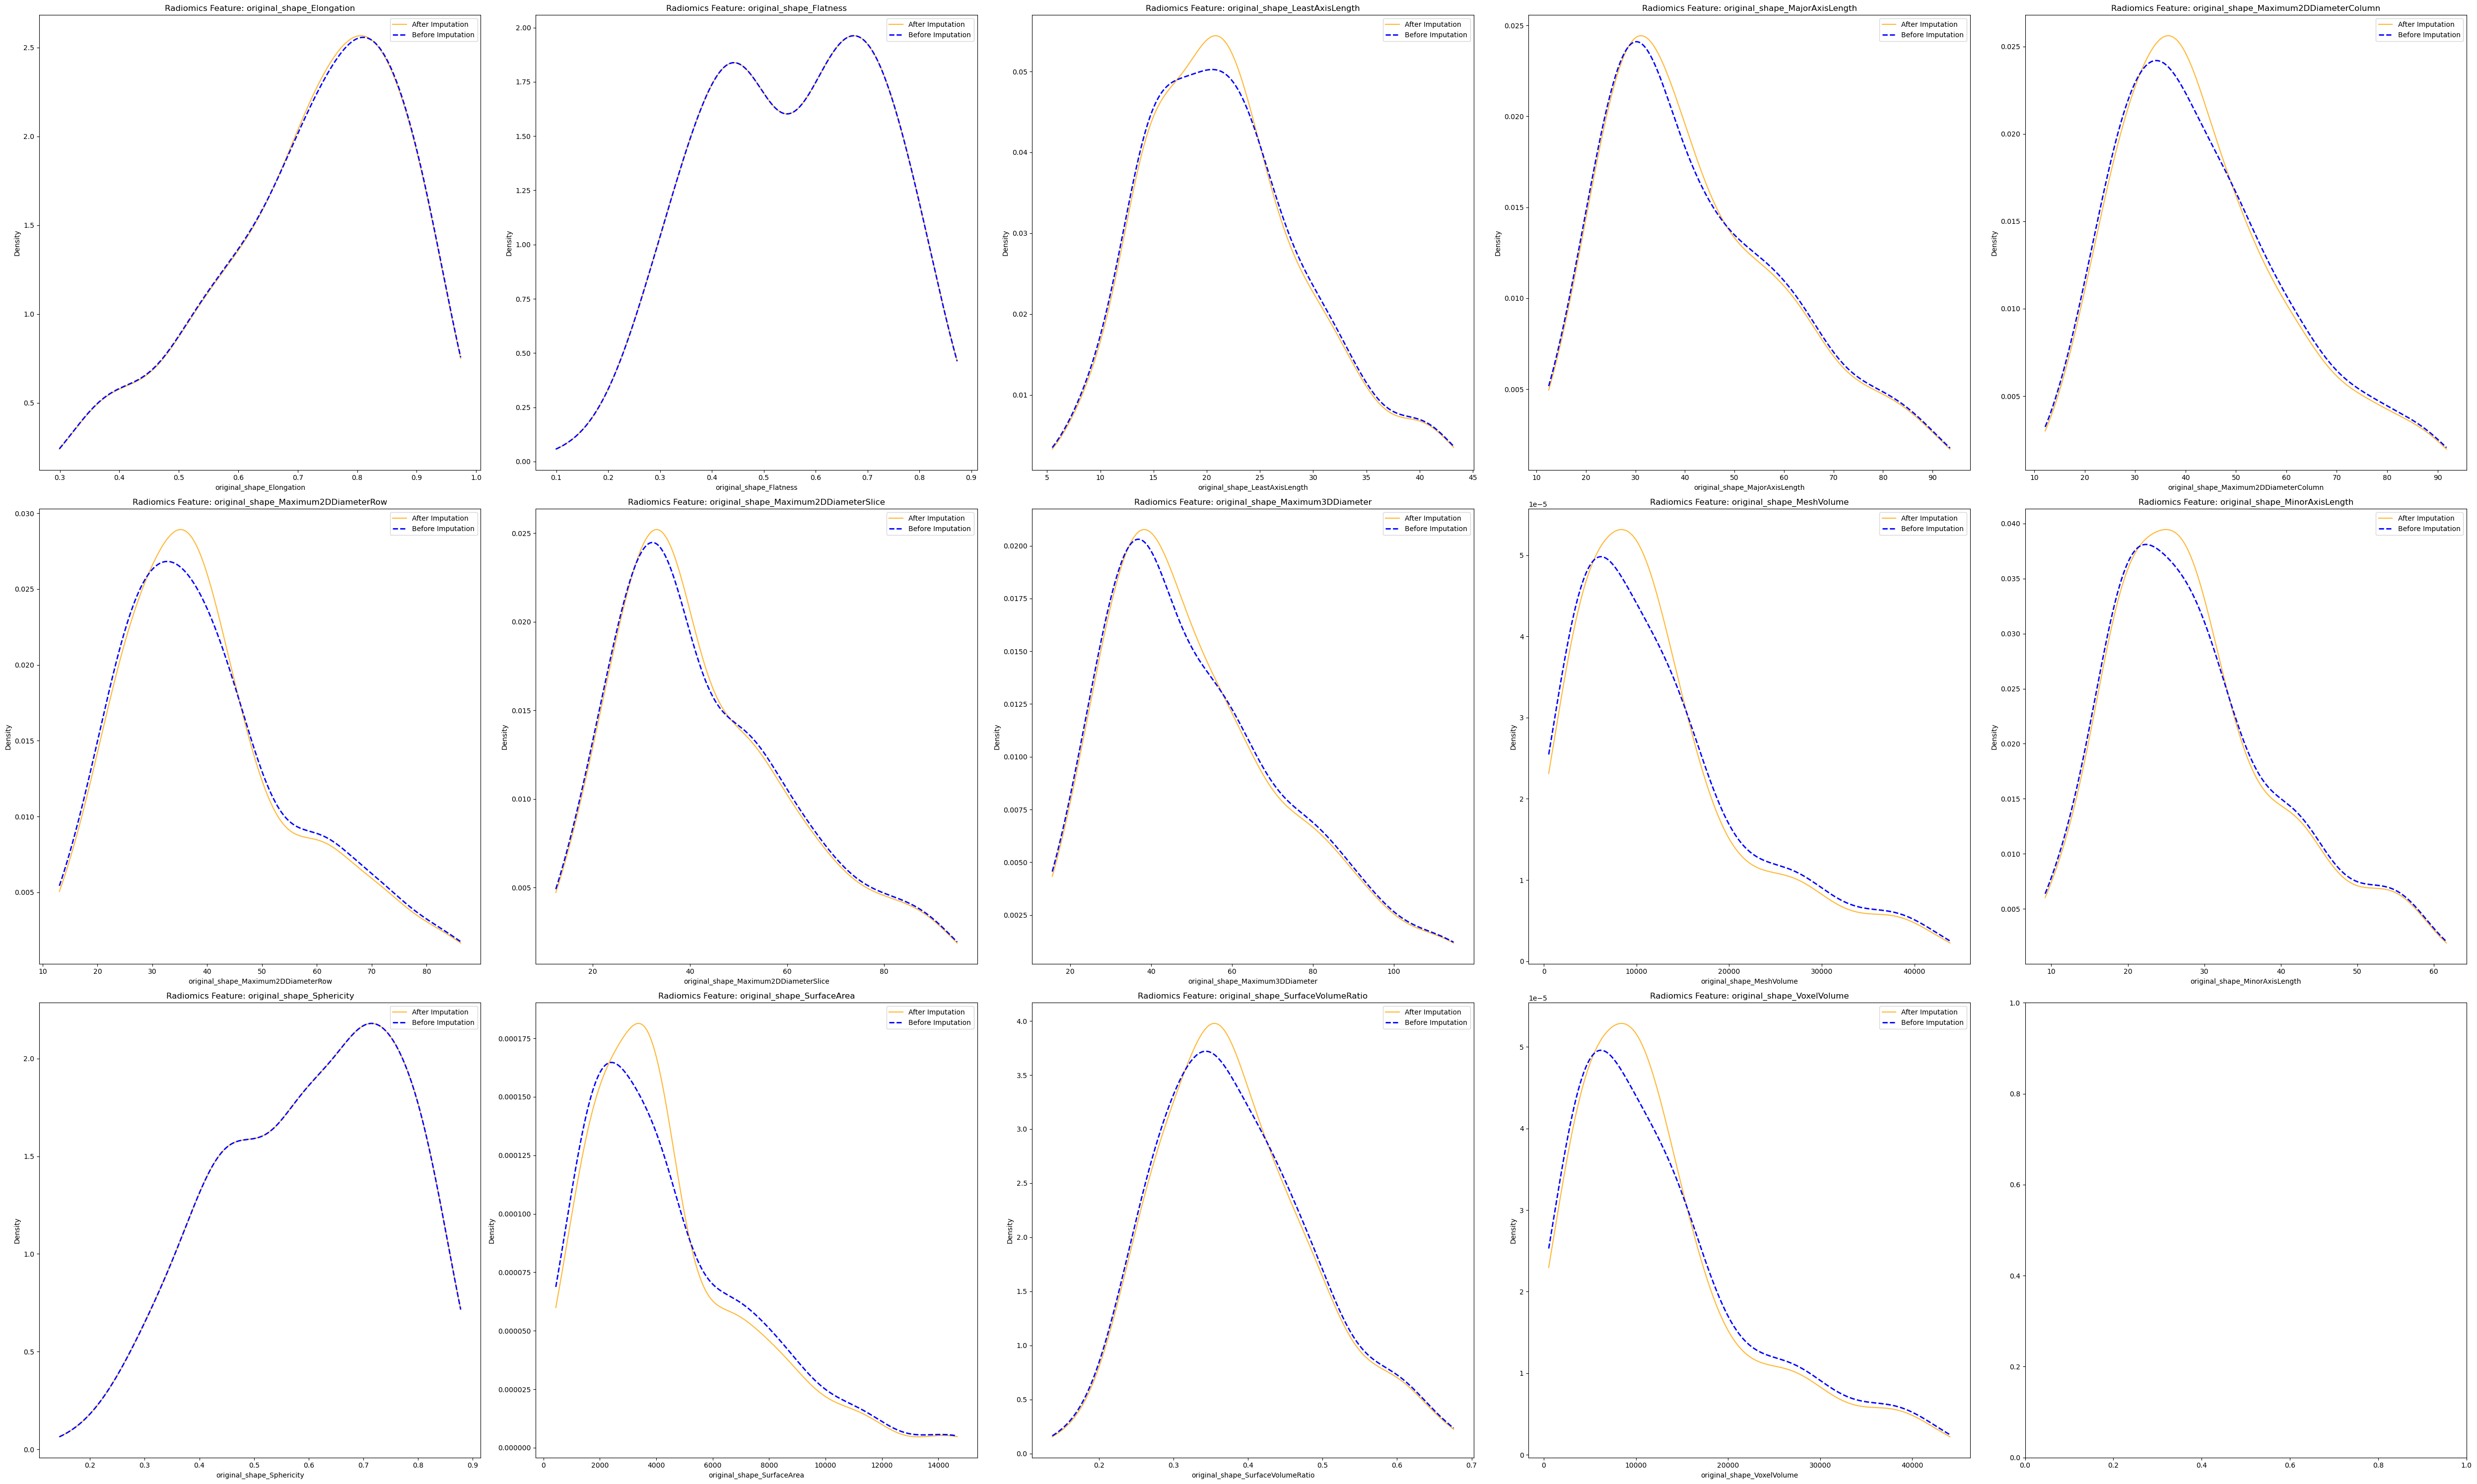

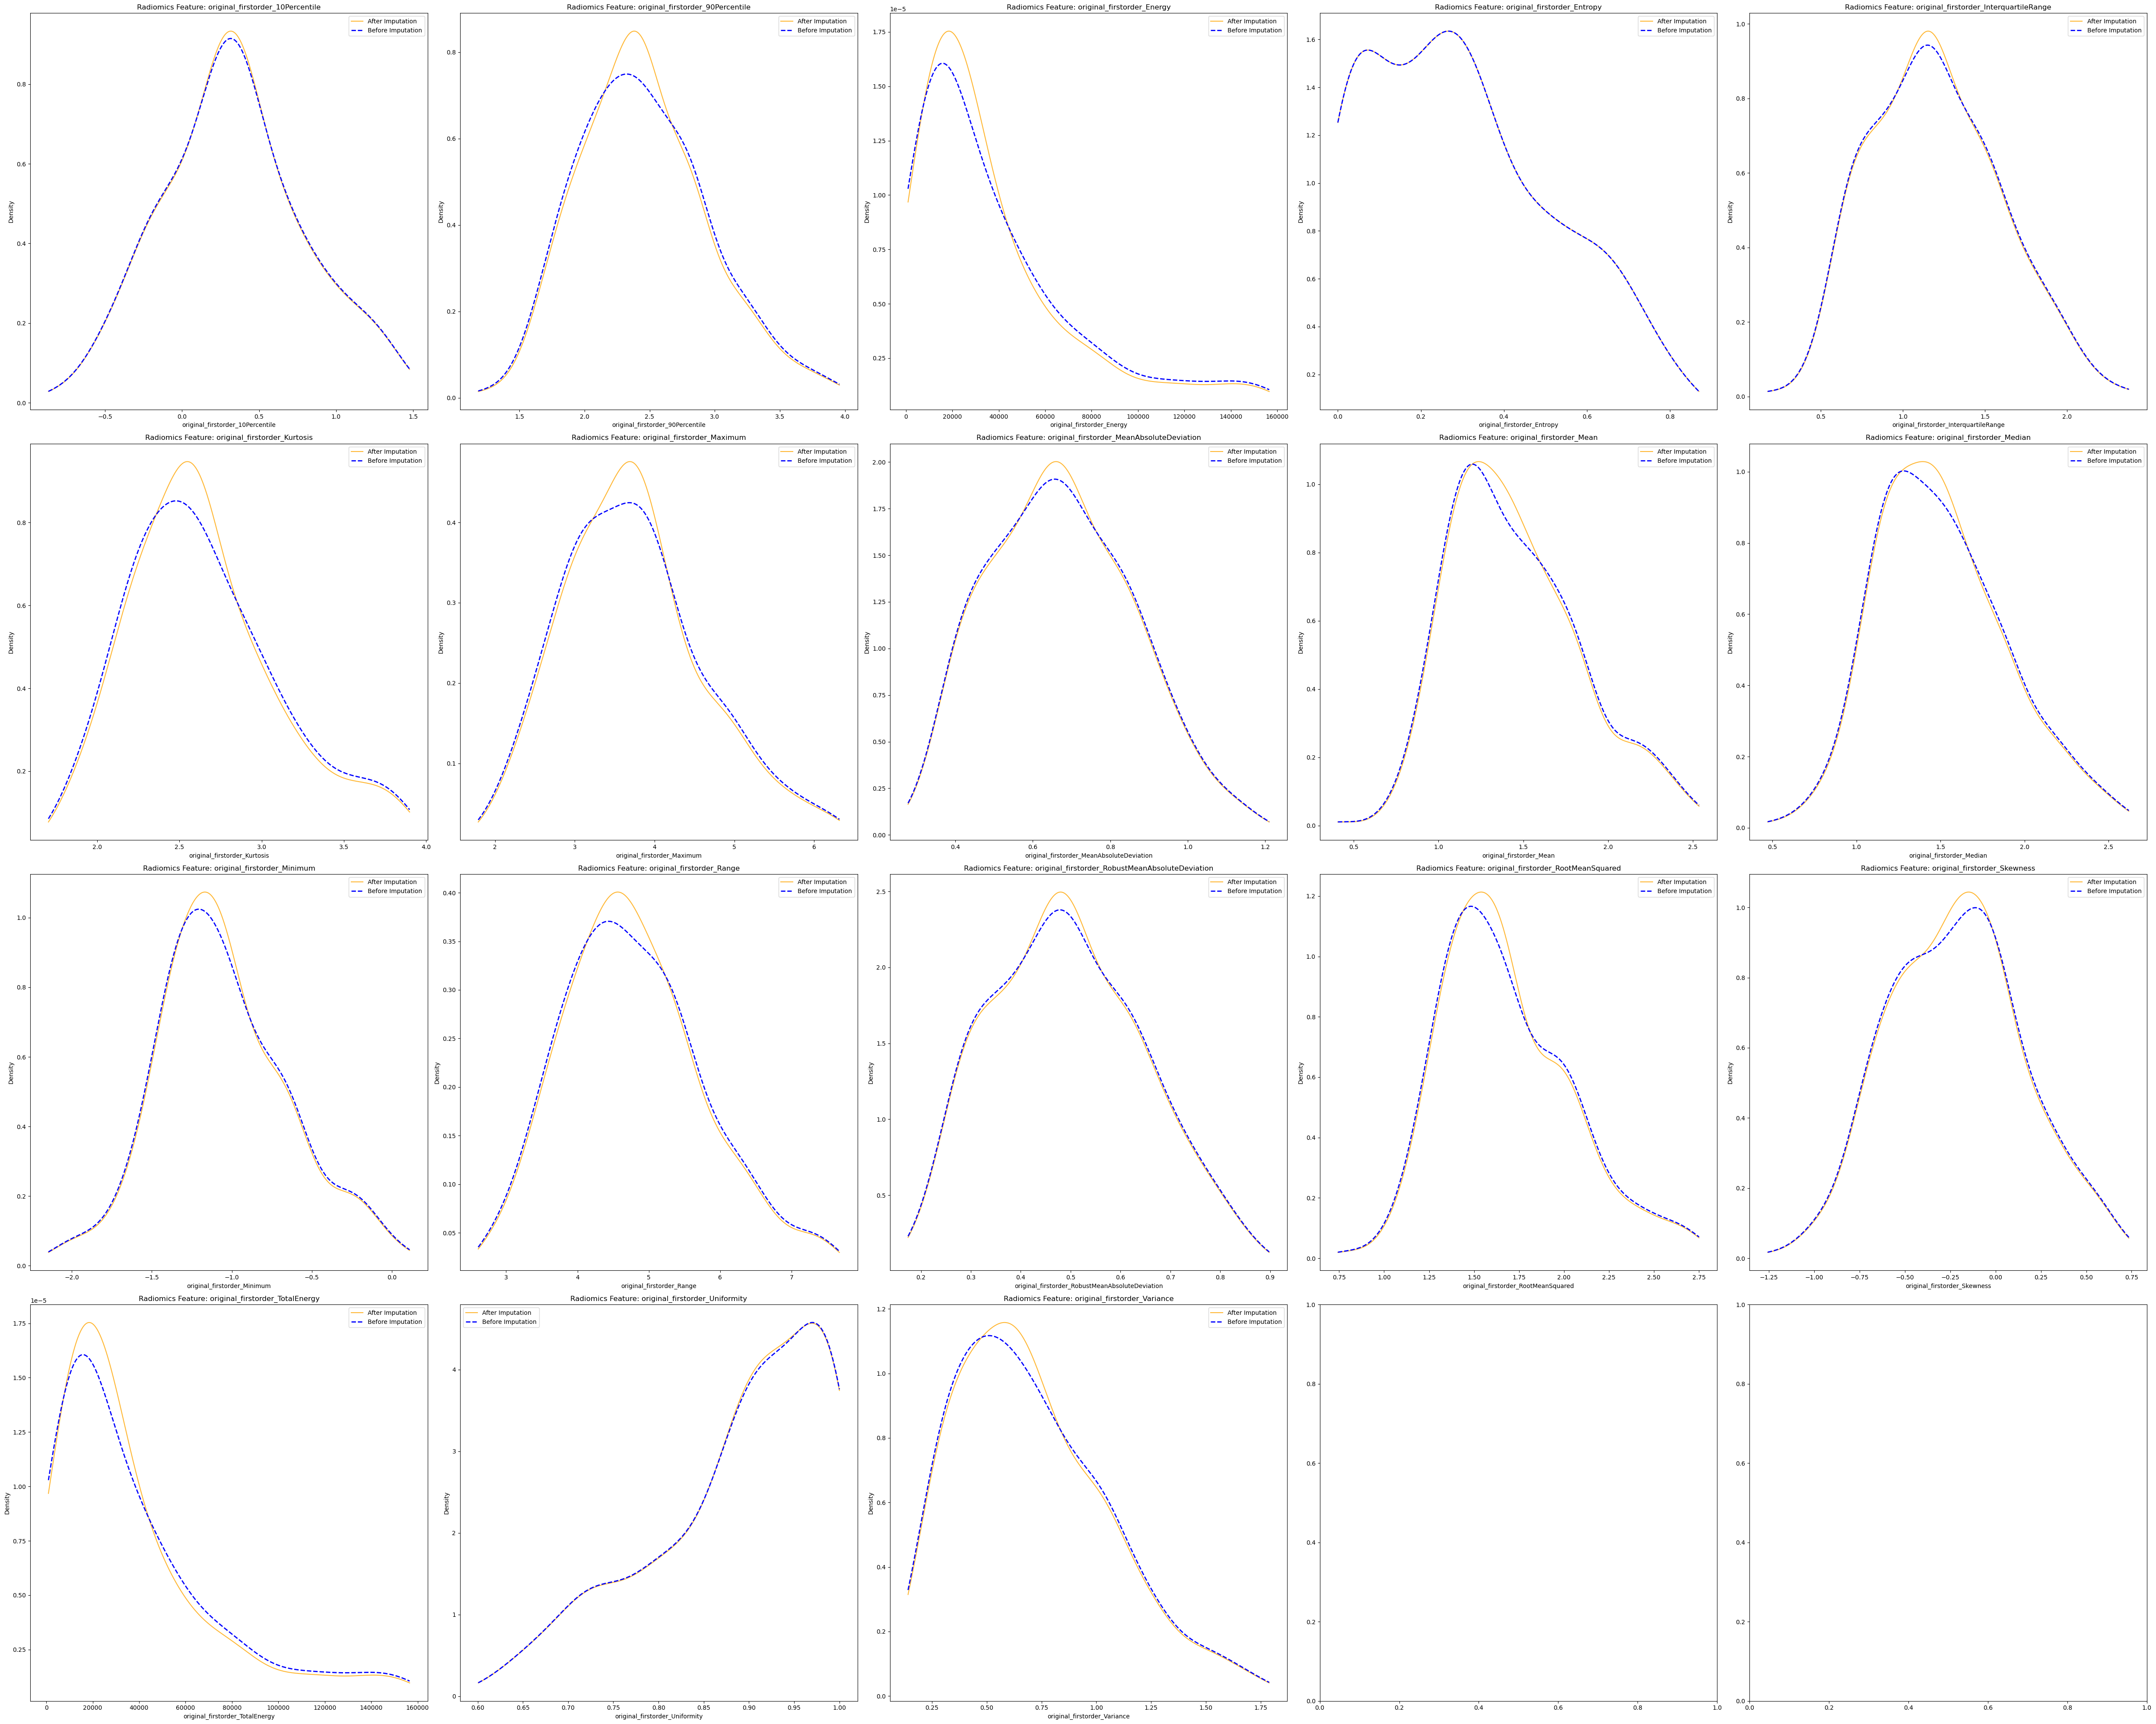

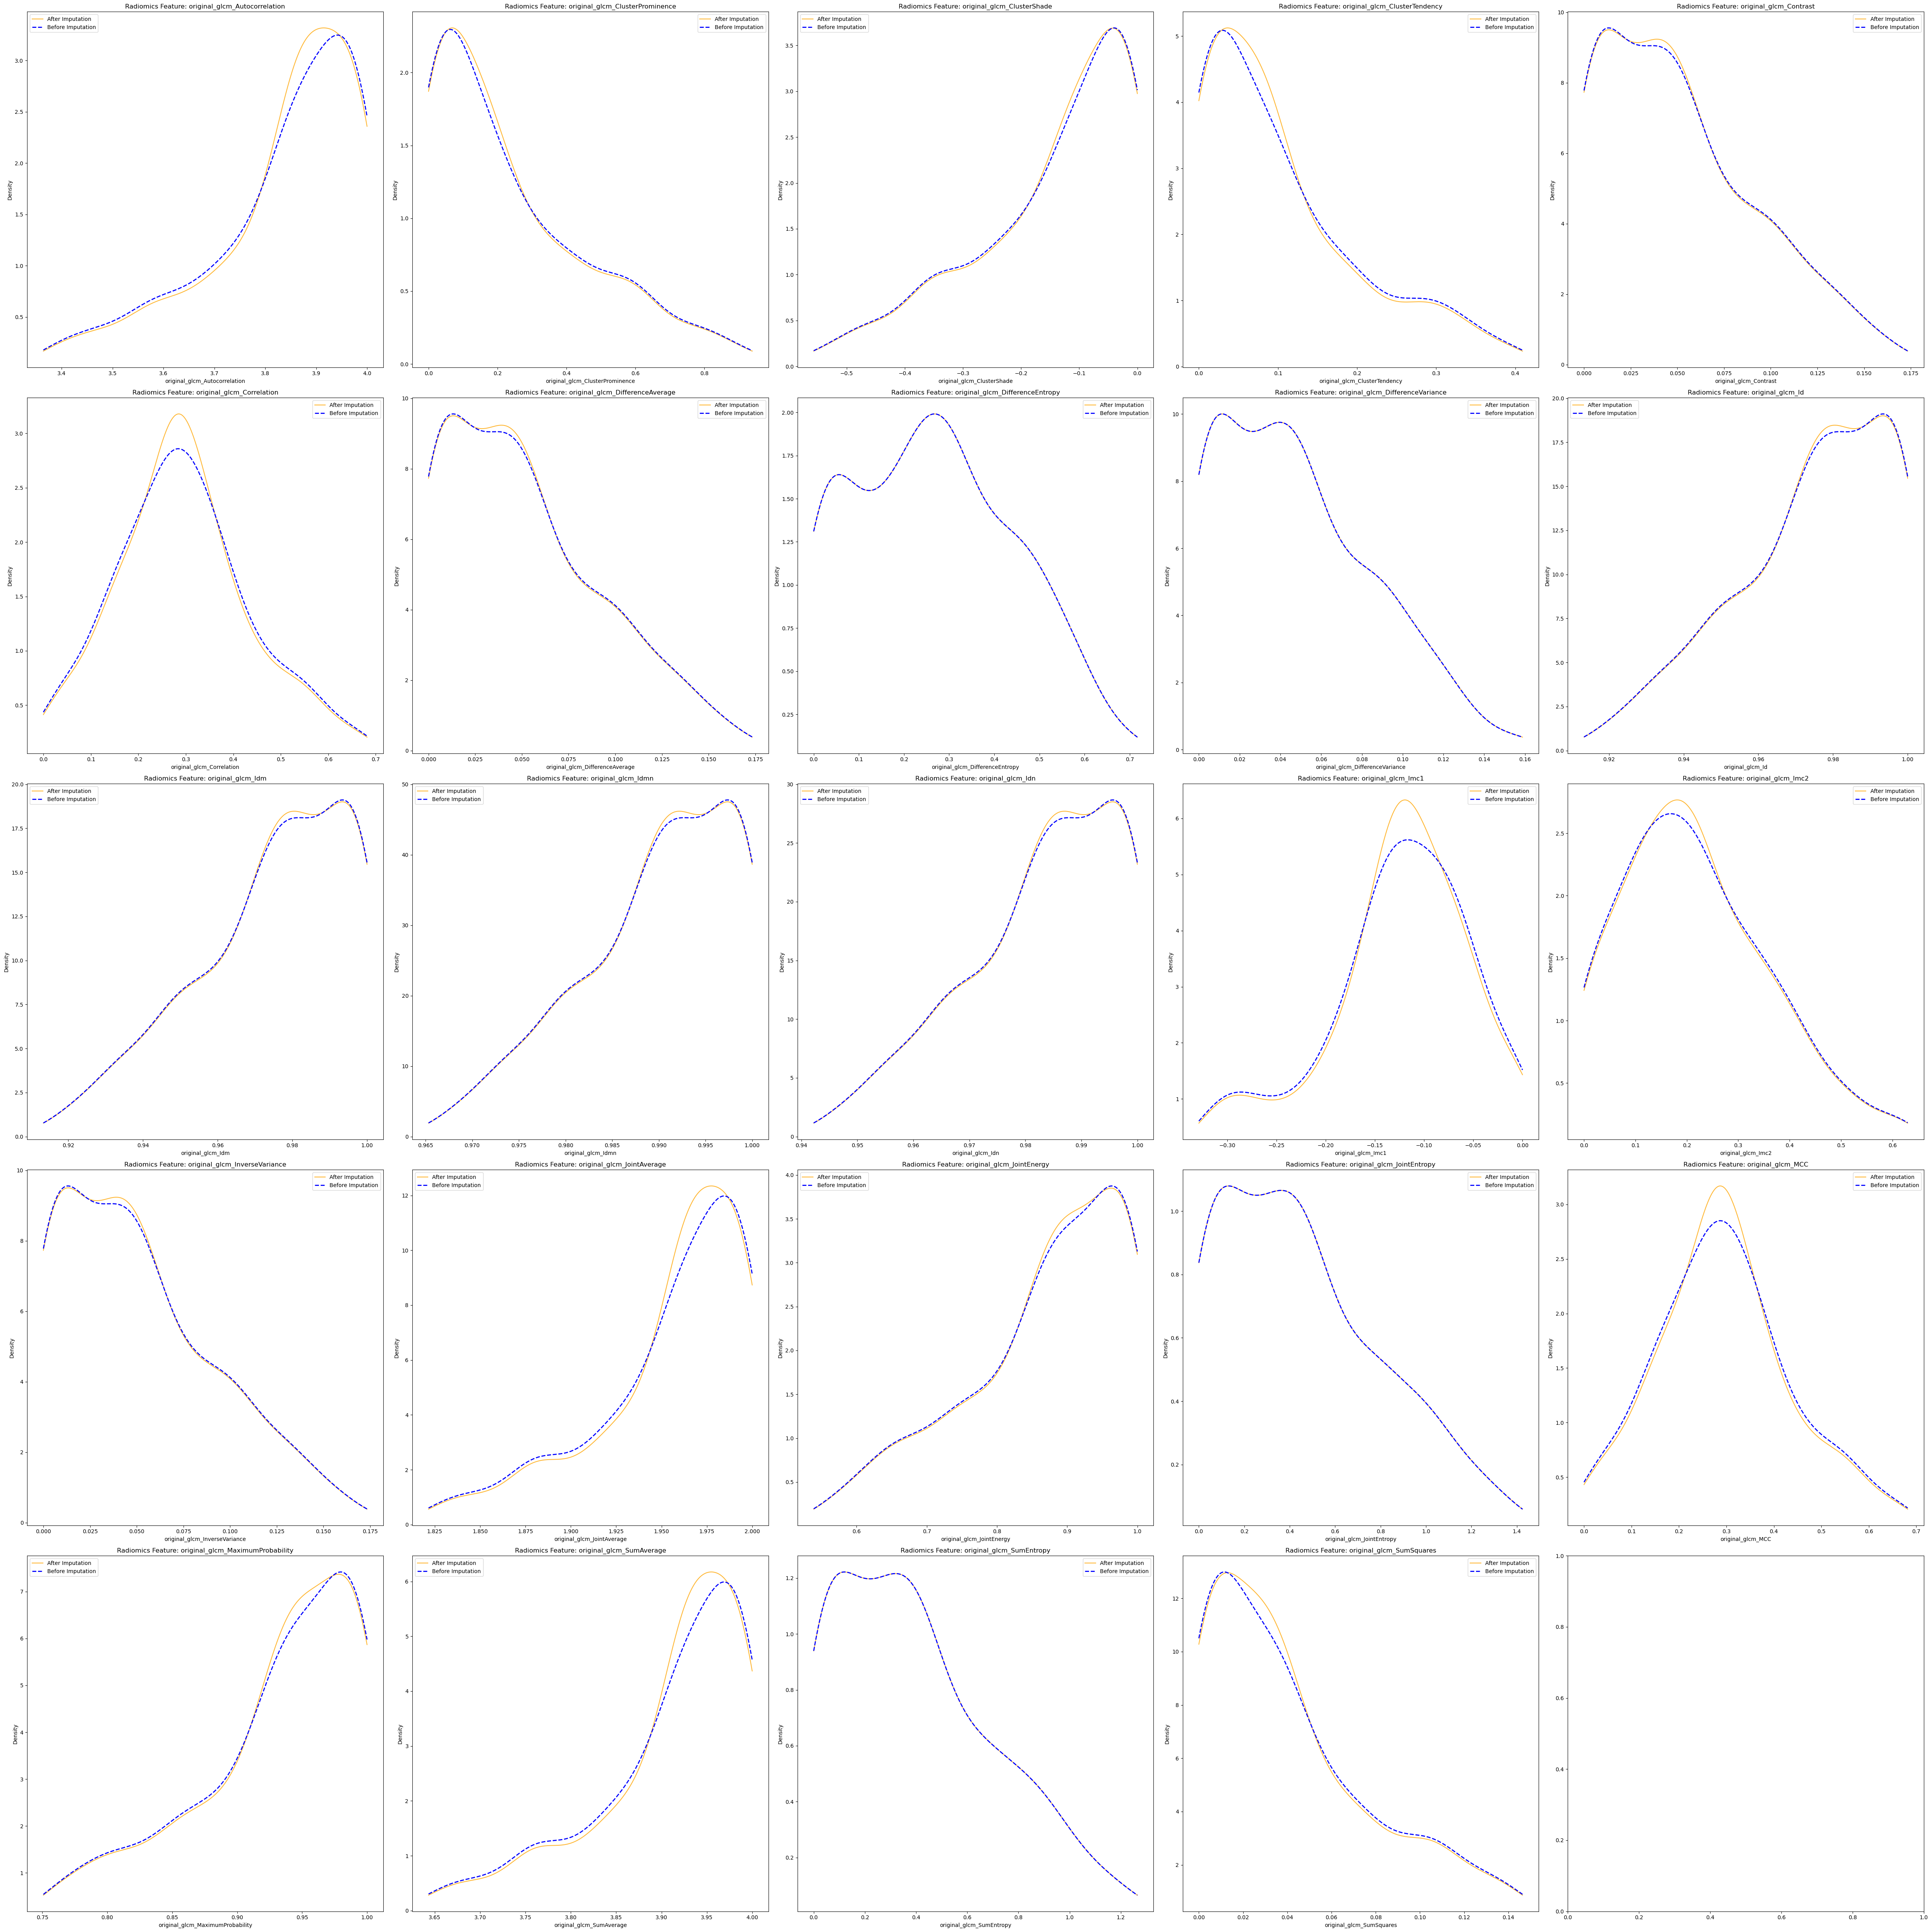

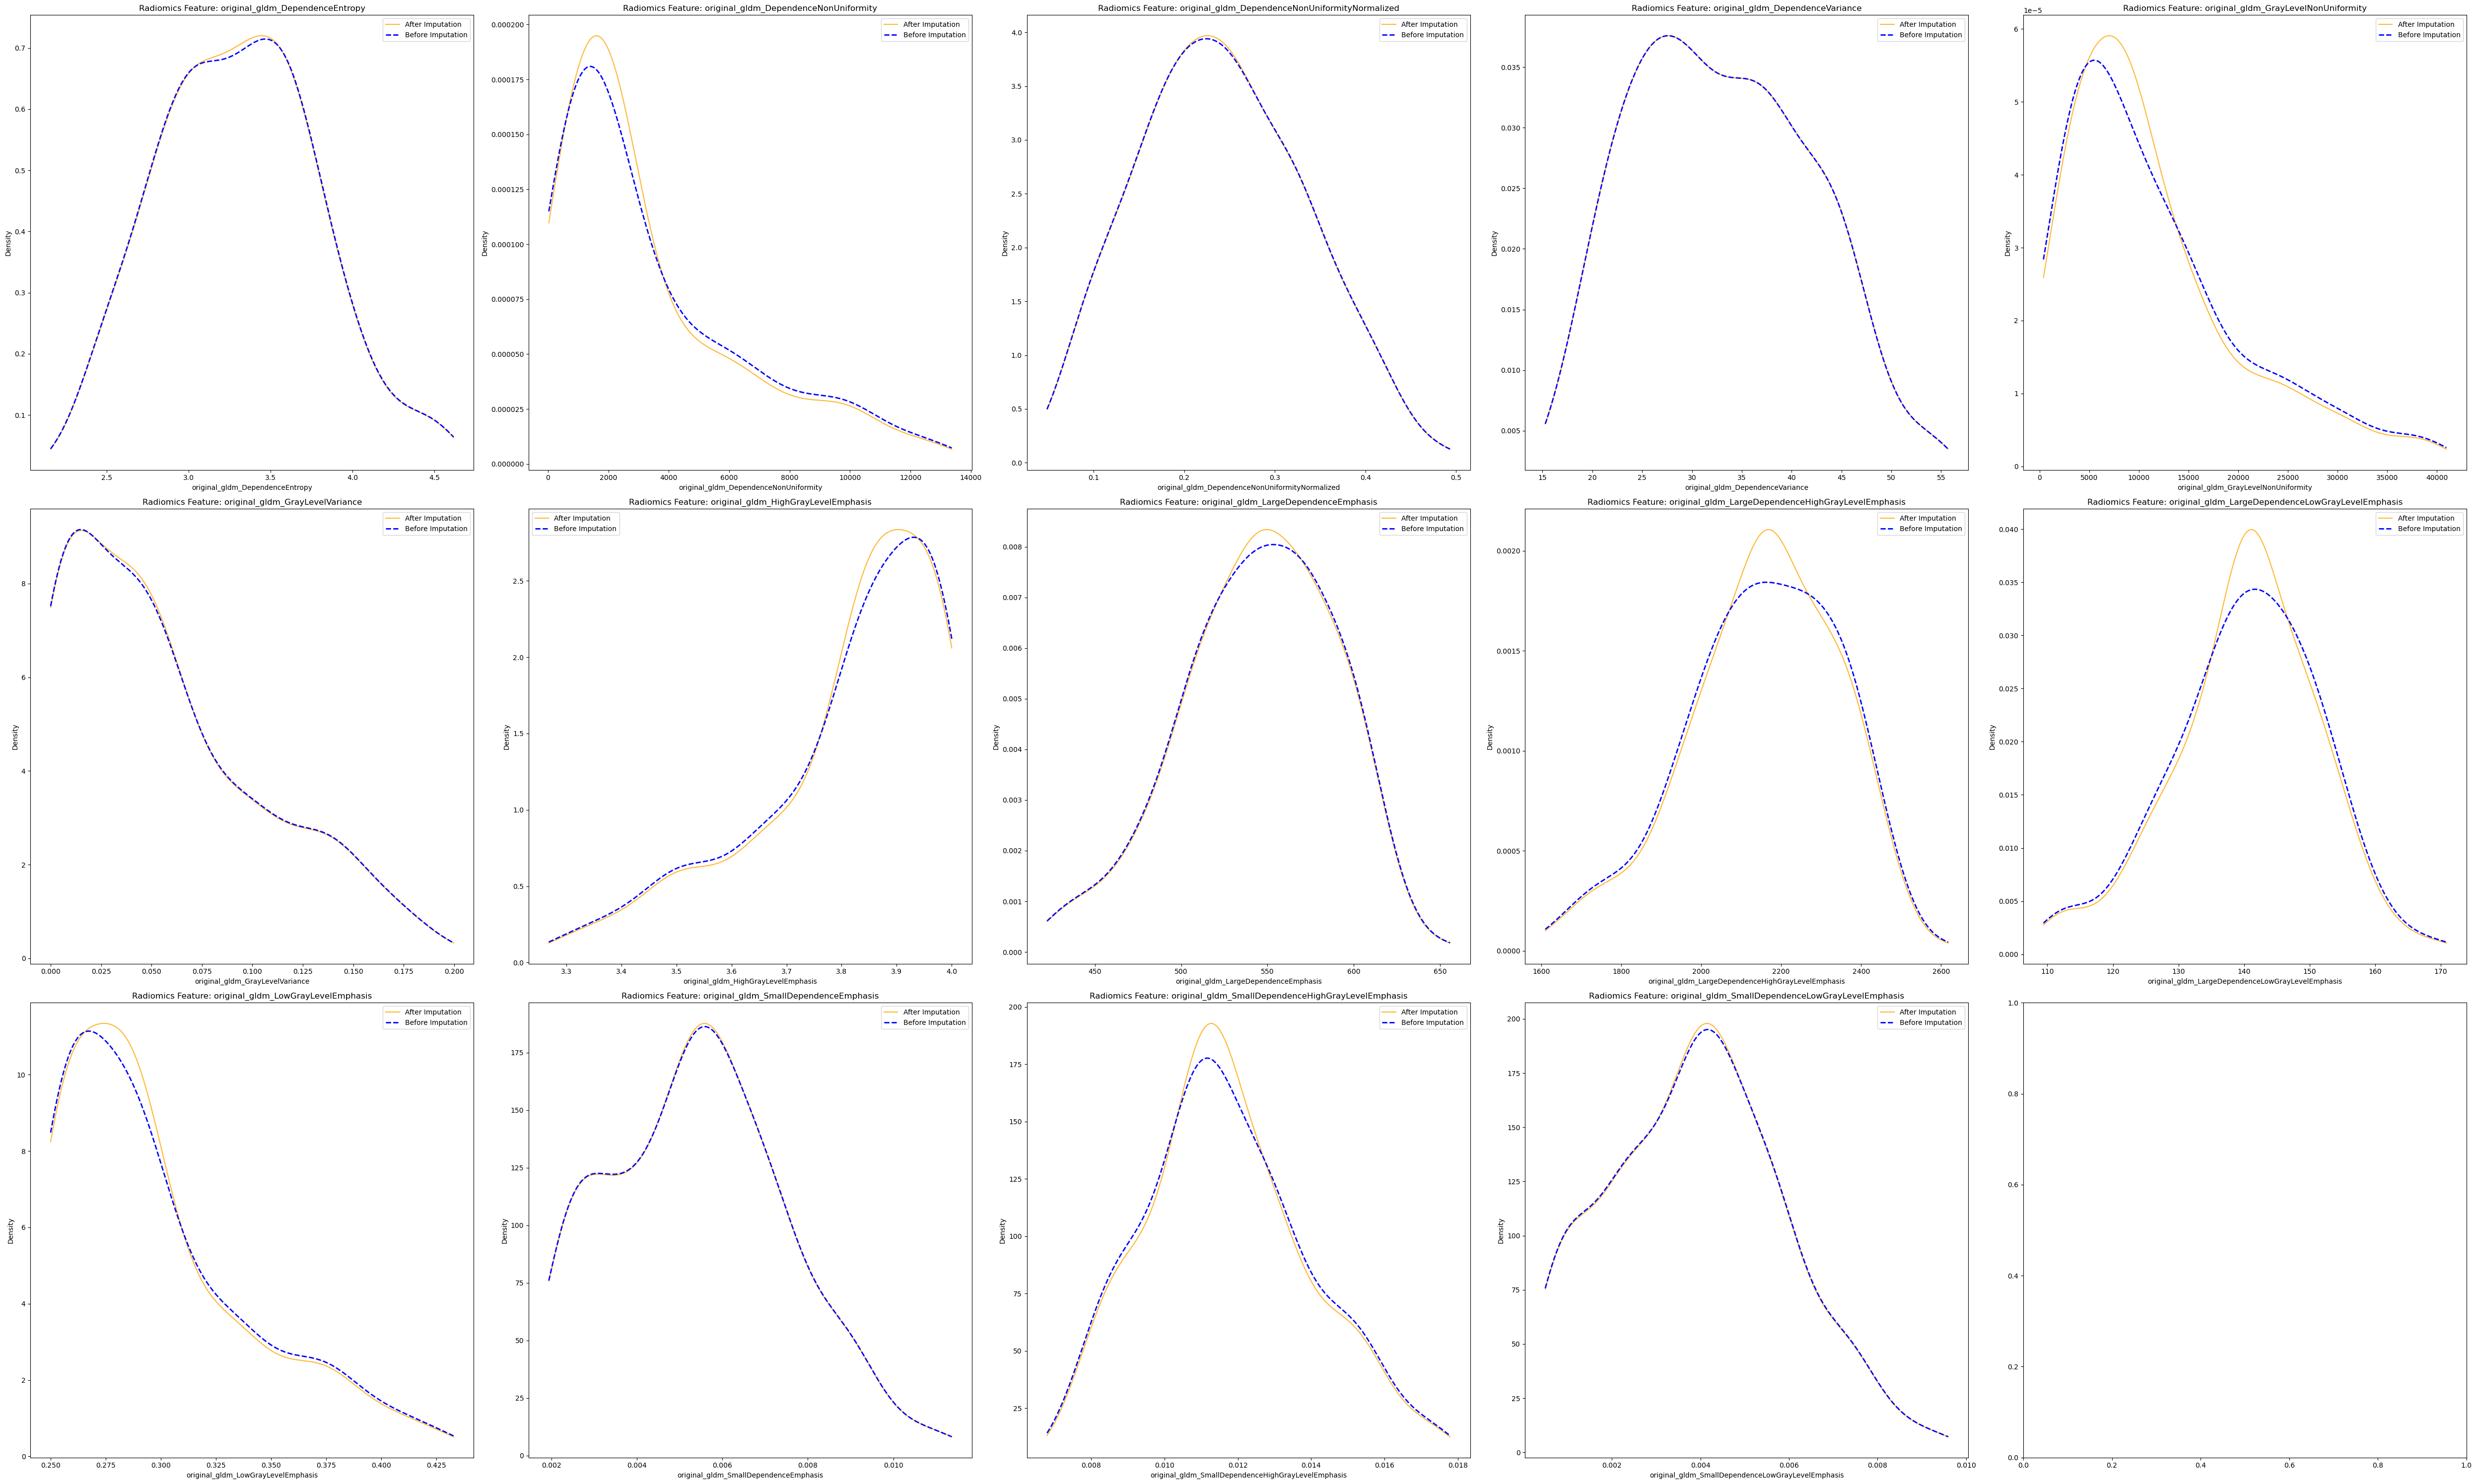

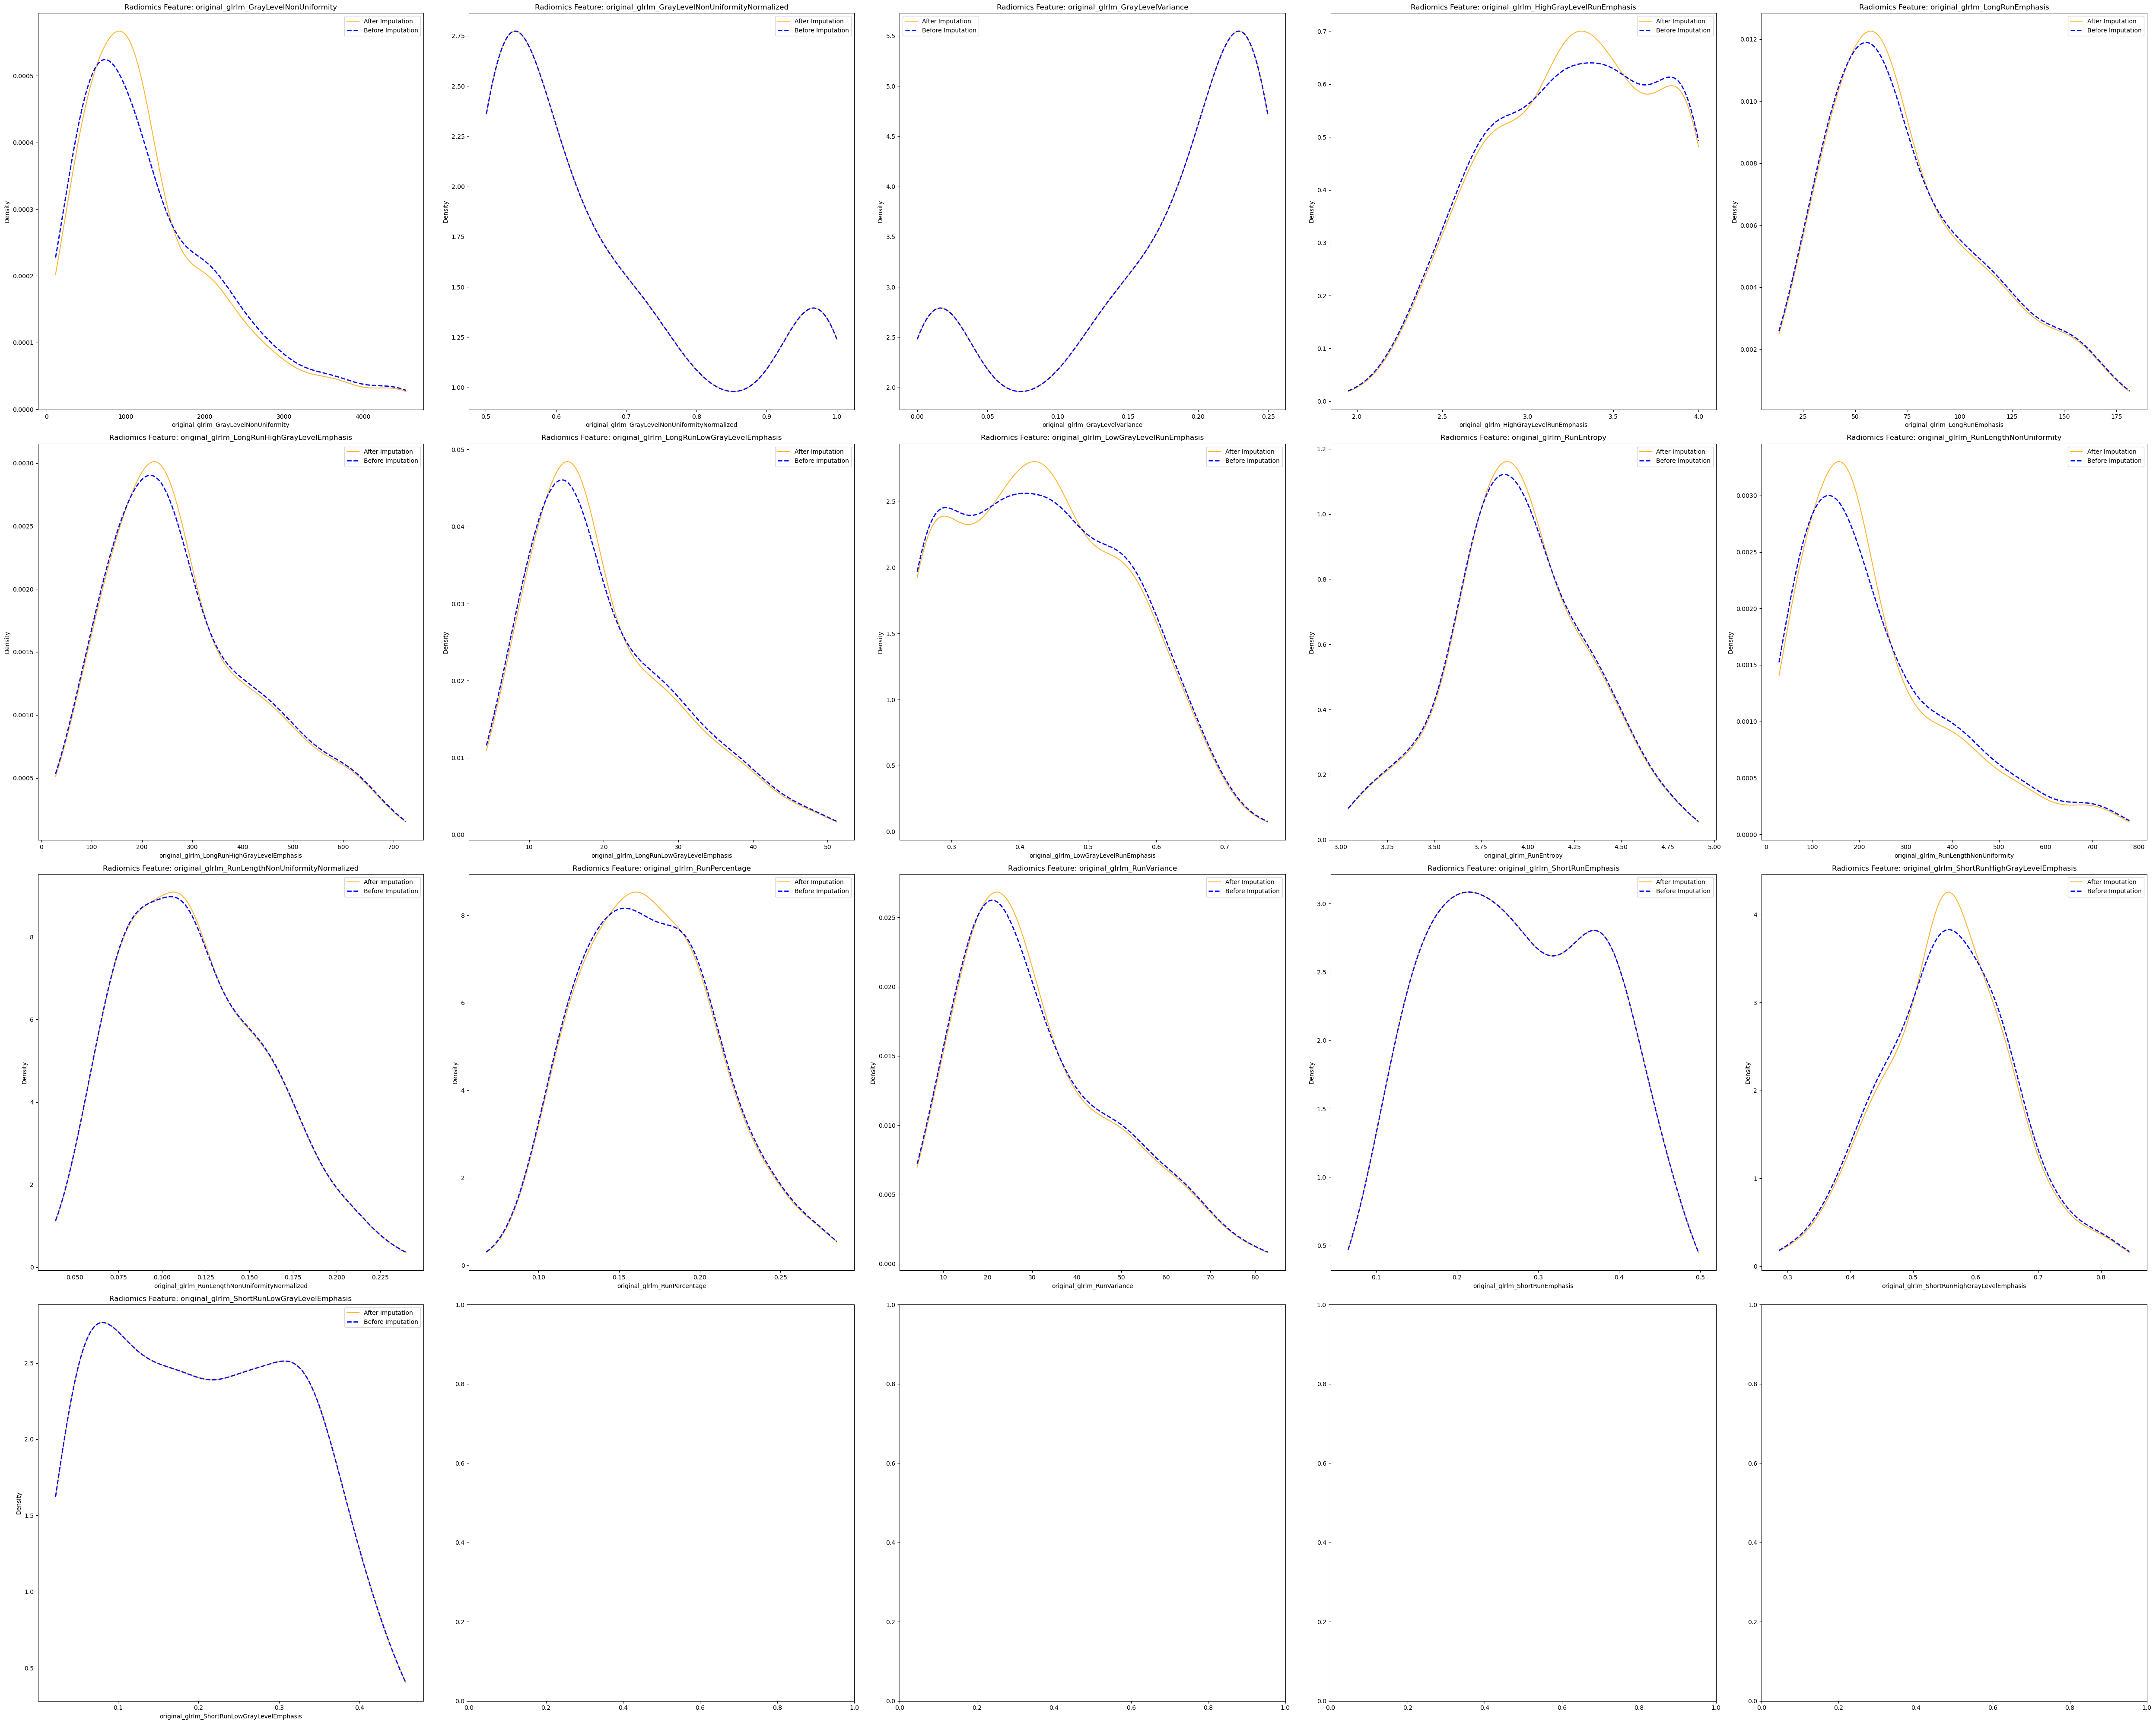

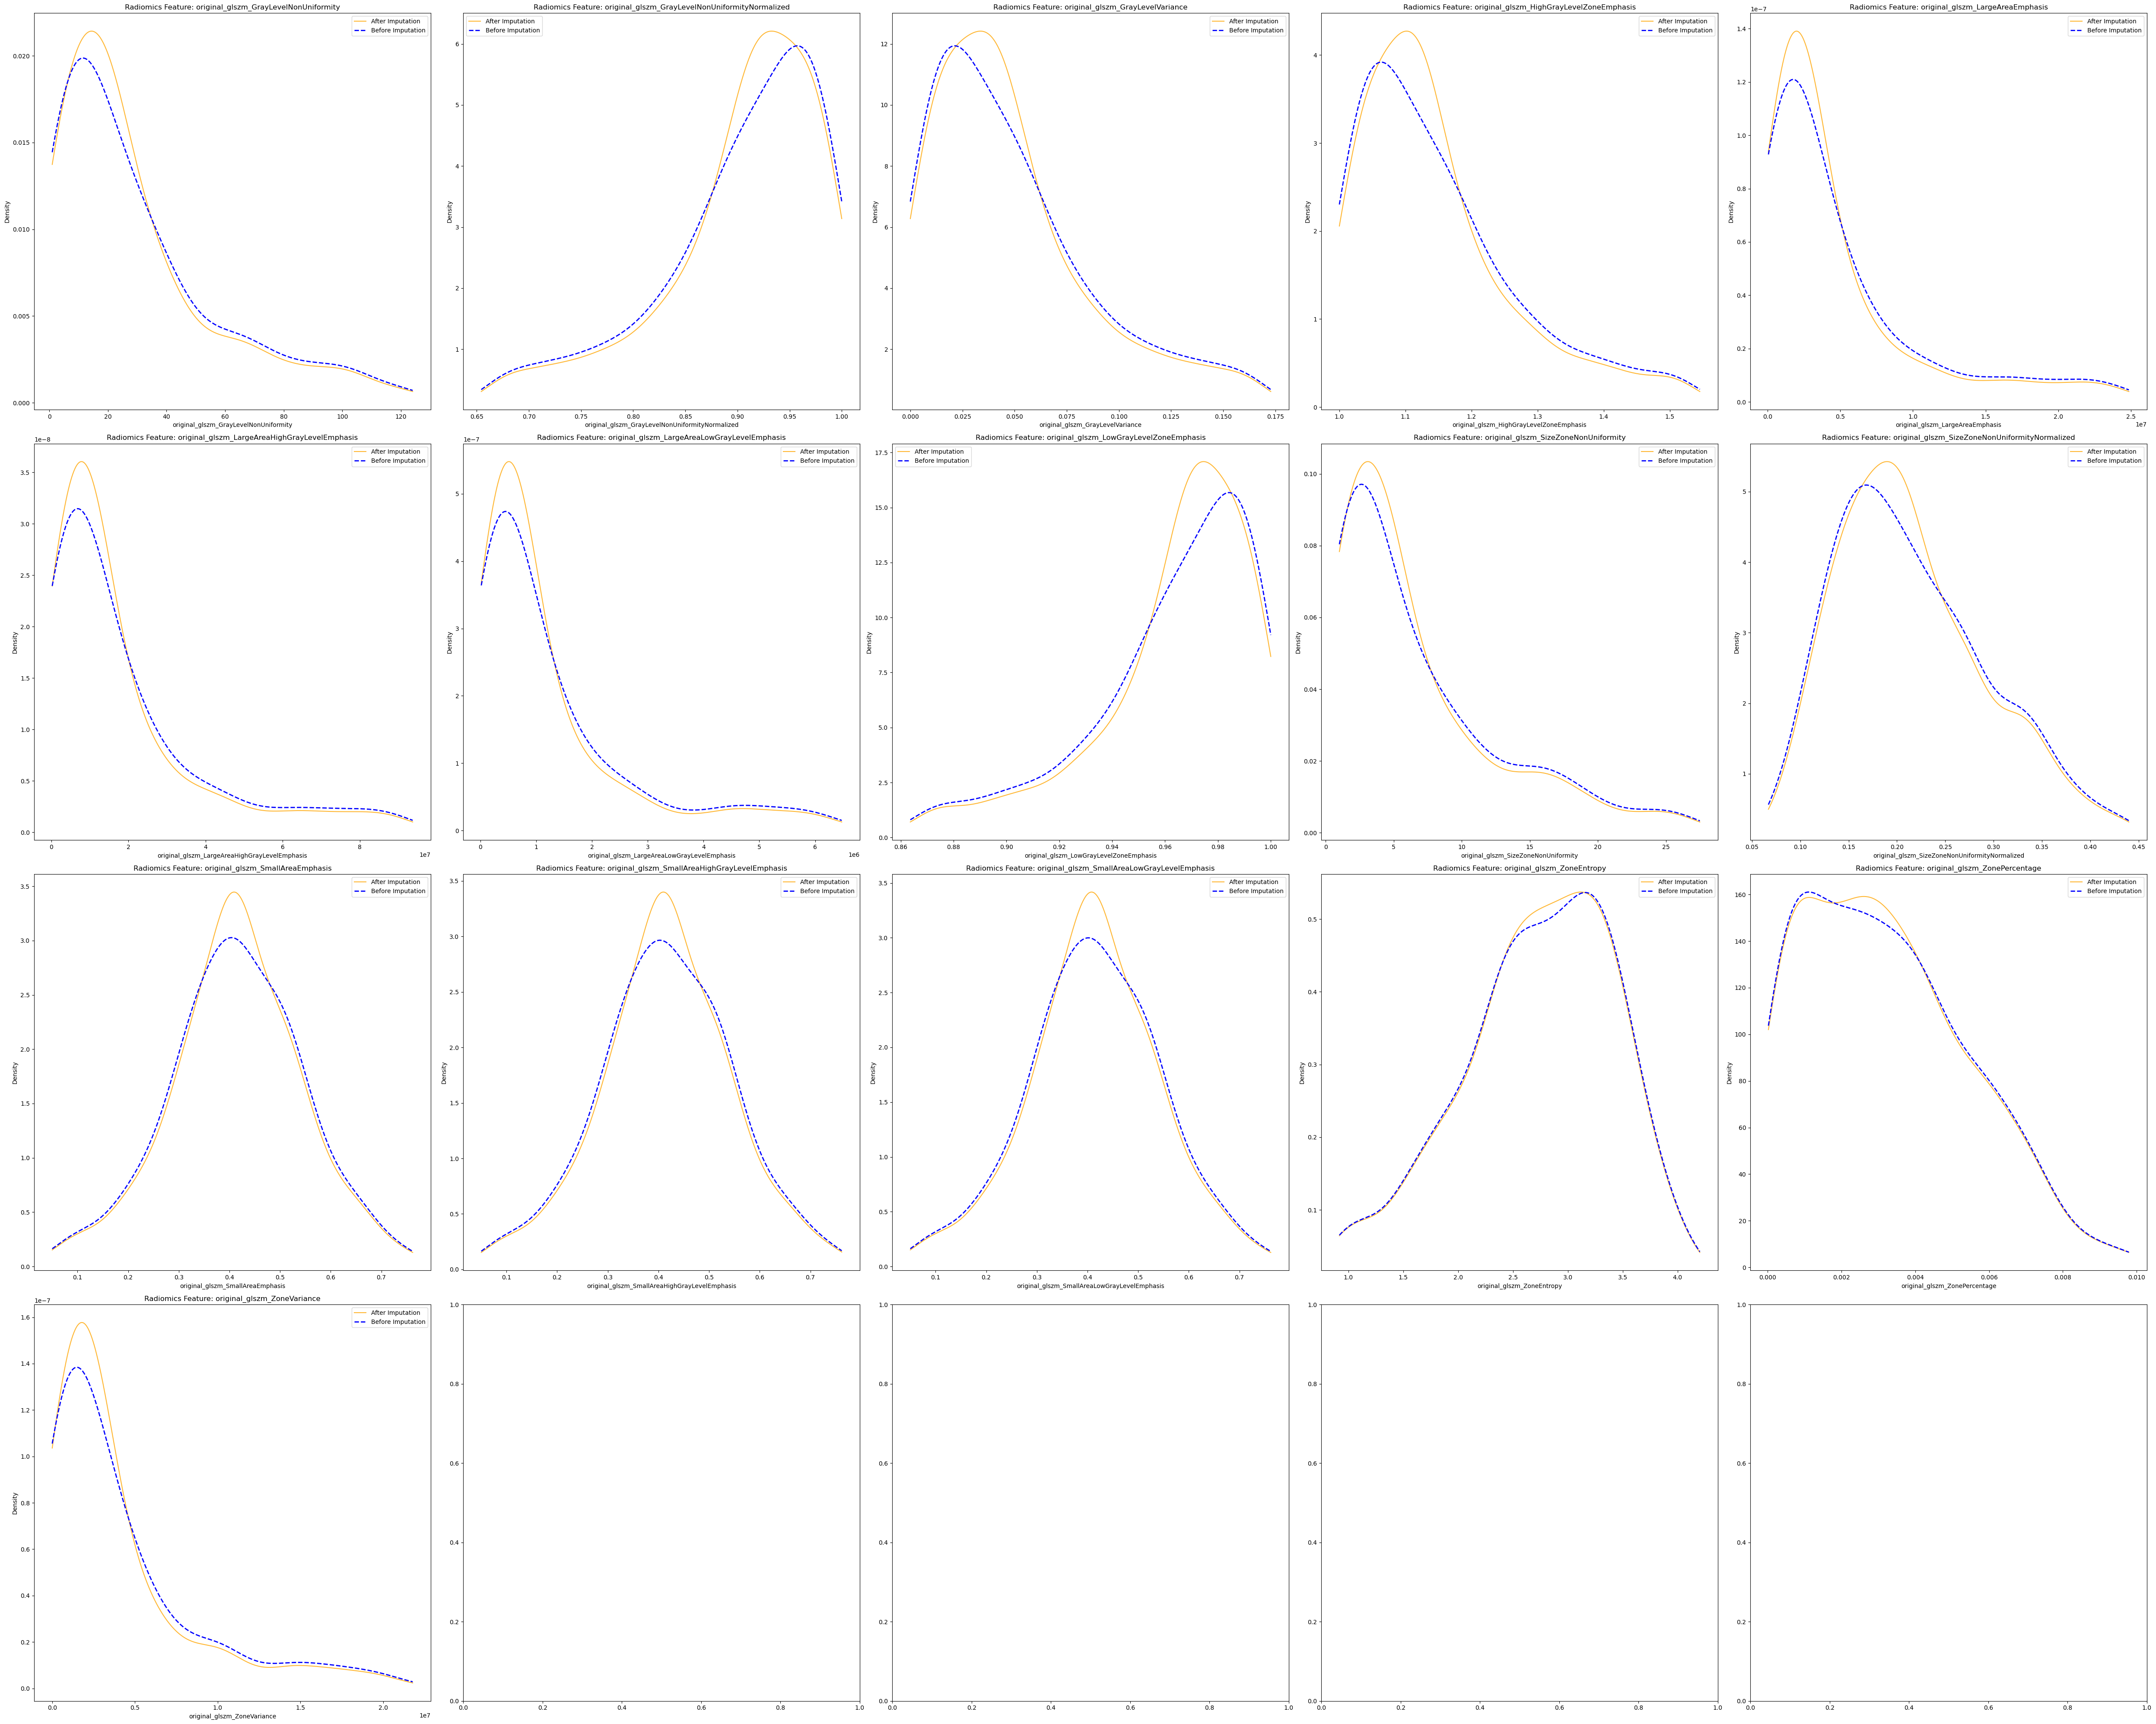

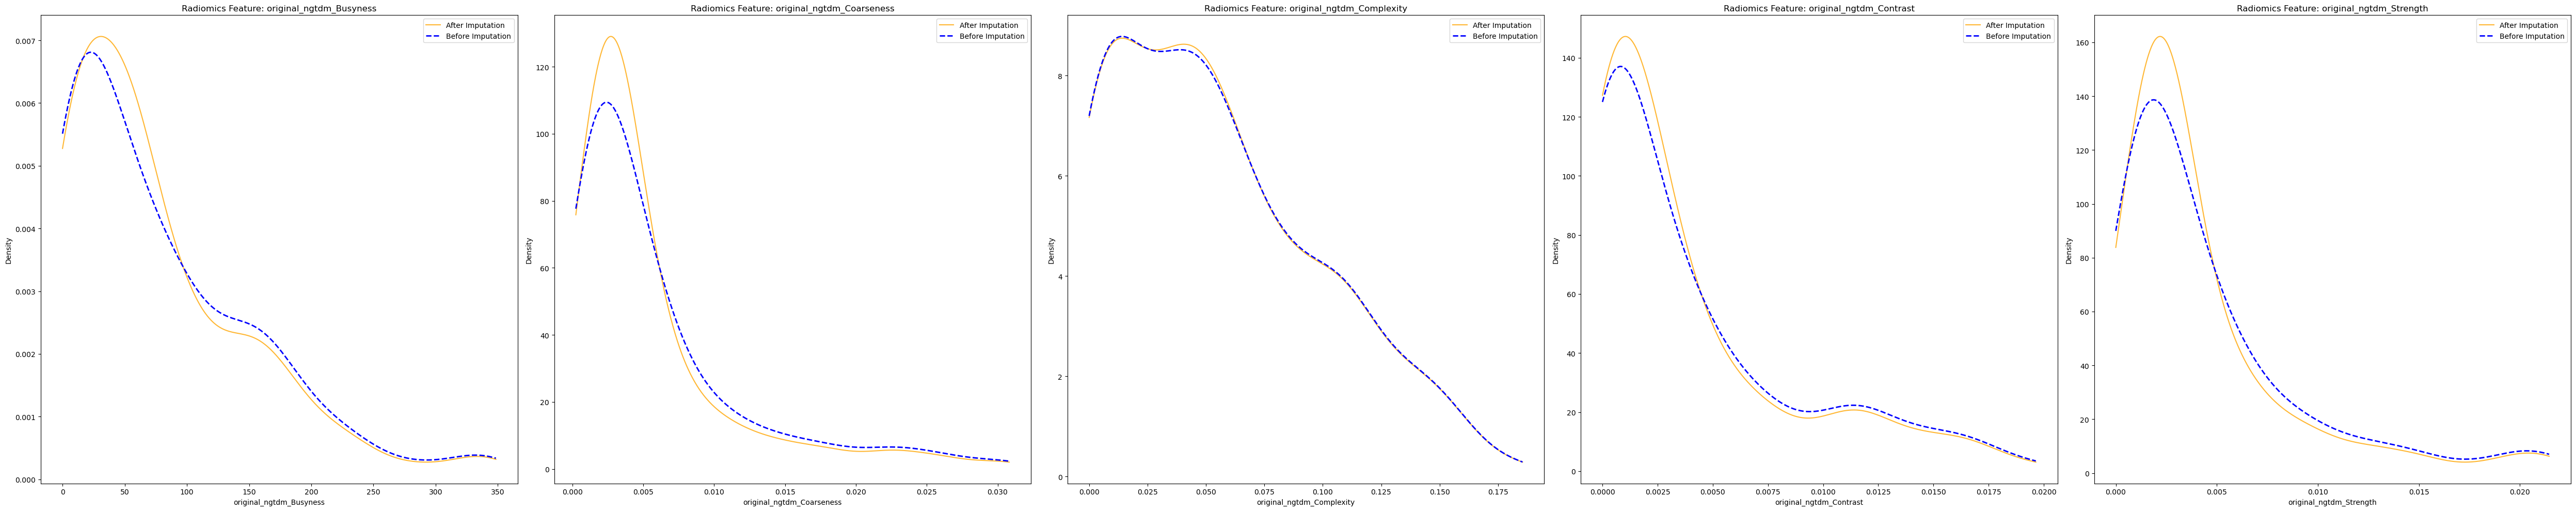

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import math

for k, group in MRI_group_dict.items():
  # Plot each MRI group features
  size = len(group)
  rows = math.ceil(size/5)
  fig, axes = plt.subplots(nrows=rows, ncols=5, figsize=(50, 10*rows))
  axes = axes.flatten()

  for i, feature in enumerate(group):
    ax = axes[i]

    x_vals = np.linspace(
        min(df_exp[feature].min(), df_exp_prep[feature].min()),
        max(df_exp[feature].max(), df_exp_prep[feature].max()),
        1000
    )

    # Compute KDE for before and after imputation
    kde_before = gaussian_kde(df_exp[feature].dropna())
    kde_after = gaussian_kde(df_exp_prep[feature])

    # Plot KDE with styles
    ax.plot(x_vals, kde_after(x_vals), label="After Imputation", color='orange', alpha=0.8)
    ax.plot(x_vals, kde_before(x_vals), label="Before Imputation", color='blue', linestyle='--', linewidth=2)

    # Add labels and legend
    ax.set_title(f"Radiomics Feature: {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.legend()

    plt.tight_layout()

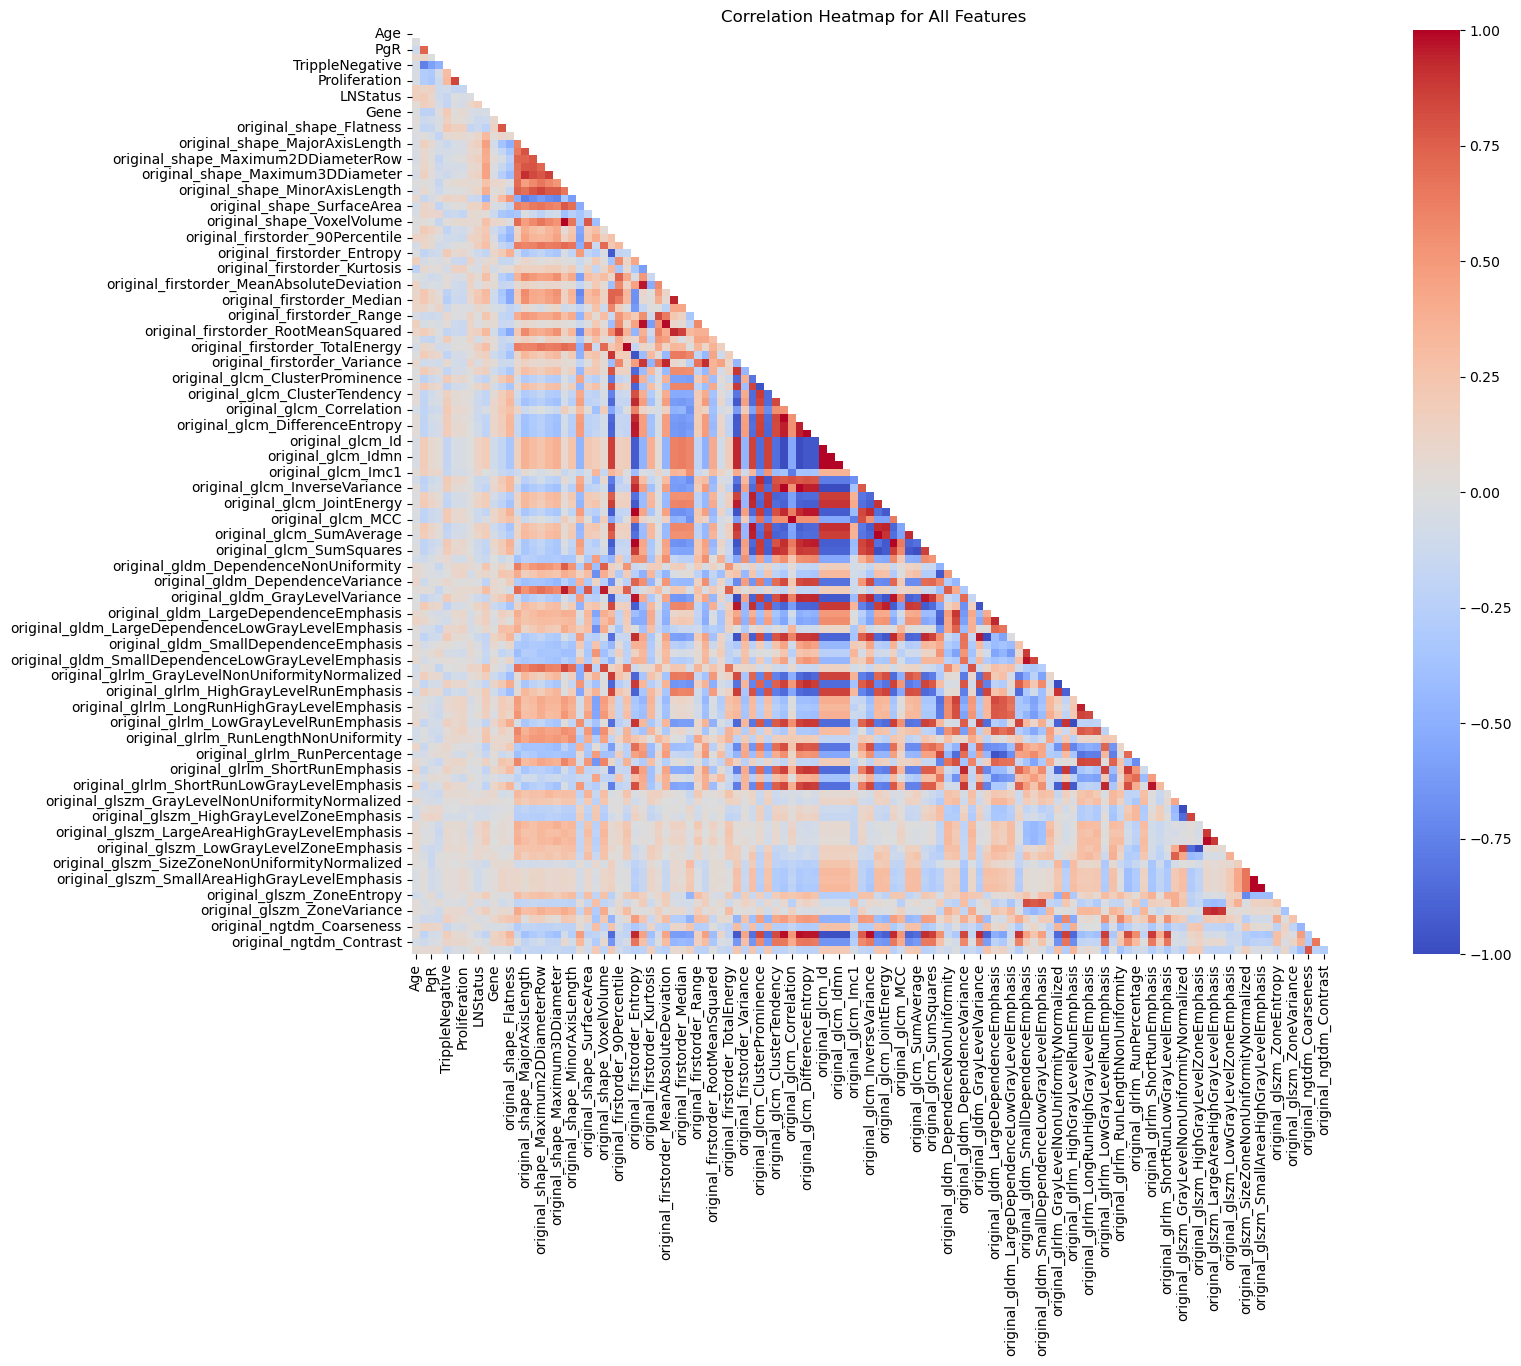

In [135]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for all features
corr_matt = df_exp_prep[features].corr()

# Mask the upper triangle of the correlation matrix for better readability
mask = np.triu(np.ones_like(corr_matt, dtype=bool))

# Plot the correlation heatmap with masking
plt.figure(figsize=(20, 12))
sns.heatmap(
    corr_matt,
    mask=mask,
    cmap="coolwarm",
    annot=False,
    fmt=".2f",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap for All Features")
plt.show()

# 4. Model Development

In [137]:
# ignore hide some scikit warning output

import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)

import warnings
warnings.simplefilter("ignore", category=ConvergenceWarning)


In [138]:
# Create dataframe for classification task and drop row if it has NaN in output column
clf_features = [clf_output_column_name] + features
clf_df = pd.DataFrame(df[clf_features], columns=clf_features)
clf_df = clf_df.dropna(subset=[clf_output_column_name])

# Create dataframe for regression task and drop row if it has NaN in output column
reg_features = [reg_output_column_name] + features
reg_df = pd.DataFrame(df[reg_features], columns=reg_features)
reg_df = reg_df.dropna(subset=[reg_output_column_name])

# outlier treatment ZScore vs IQR

In [140]:
import numpy as np
from typing import Literal

# Define methods available for handle outliers
handle_outlier_methods = Literal["iqr", "zscore"]

# Detect outliers and change them to NaN
def handle_outlier(df: pd.DataFrame, method: handle_outlier_methods) -> pd.DataFrame:
    df_na = df.copy()

    # Using IQR to detect outliers
    if method == "iqr":
        # Check every MRI featueres
        for feature in MRI_features:
            Q1 = df_na[feature].quantile(0.25)
            Q3 = df_na[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Set outliers to NaN
            df_na[feature] = np.where(
                (df_na[feature] < lower_bound) | (df_na[feature] > upper_bound),
                np.nan,
                df_na[feature],
            )
    # Using Modified Z-score to detect outliers
    elif method == "zscore":
        threshold = 3.5  # z-score threshold
        for feature in MRI_features:
            median = df_na[feature].median()
            mad = np.median(
                np.abs(df_na[feature] - median)
            )  # Median absolute deviation
            z_score = 0.6745 * (df_na[feature] - median) / mad
            df_na[feature] = np.where(
                np.abs(z_score) > threshold,
                np.nan,
                df_na[feature],
            )

    return df_na

# data imputation (knn) & scaling 

In [142]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from typing import Literal


# Define methods available for preprocess
data_preprocessing_methods = Literal["median", "normalize", "knn"]

# Preprocessing data before fit model (imputation, feature selection, dimension reduction)
def data_preprocess_fit_transform(
    df: pd.DataFrame,
    y_column_name: str,
    processes: list[data_preprocessing_methods],
):
    df_prep = df.copy()
    # Define output column
    y = df_prep[y_column_name]
    # Define dataframe with only feature columns
    df_prep = df_prep.drop(y_column_name, axis=1)

    imputer = SimpleImputer(strategy="median")
    scaler = StandardScaler()
    knn_imputer = KNNImputer()

    for process in processes:
        # Impute NaN with median in continuous data type columns
        if process == "median":
            df_prep[features_continuous] = imputer.fit_transform(
                df_prep[features_continuous]
            )
            continue

        # Normalize continuous data type columns
        if process == "normalize":
            df_prep[features_continuous] = scaler.fit_transform(
                df_prep[features_continuous]
            )
            continue

        # Impute NaN with KNN in every column
        if process == "knn":
            data_prep = knn_imputer.fit_transform(df_prep)
            df_prep = pd.DataFrame(np.column_stack((y, data_prep)), columns=df.columns)
            continue

    # Make categorical data integer
    df_prep[features_categorical] = df_prep[features_categorical].round()

    # # Check if there are still any missing values
    # print("Remaining missing values after imputation:")
    # print(df_prep.isnull().sum())
    # pd.set_option("display.max_rows", 200)

    return df_prep, imputer, knn_imputer, scaler


# Preprocessing data with trained preprocessor (imputation, feature selection, dimension reduction)
def data_preprocess_transform(
    df: pd.DataFrame,
    imputer: SimpleImputer,
    knn_imputer: KNNImputer,
    scaler: StandardScaler,
    processes: list[data_preprocessing_methods],
):
    df_prep = df.copy()
    for process in processes:
        # Impute NaN with median in continuous data type columns
        if process == "median":
            df_prep[features_continuous] = imputer.transform(
                df_prep[features_continuous]
            )
            continue

        # Normalize continuous data type columns
        if process == "normalize":
            df_prep[features_continuous] = scaler.transform(
                df_prep[features_continuous]
            )
            continue

        # Impute NaN with KNN in every column
        if process == "knn":
            data_prep = knn_imputer.transform(df_prep)
            df_prep = pd.DataFrame(data_prep, columns=features)
            continue

    # make categorical data integer
    df_prep[features_categorical] = df_prep[features_categorical].round()

    return df_prep

# t test for feature importance

In [144]:
from scipy.stats import ttest_ind


# Get significant feature names with T-test score (only work with binary output - classification task output)
def feature_selection_ttest(df: pd.DataFrame, output_column_name: str) -> pd.DataFrame:
    alpha = 0.05  # null-hypothesis threshold
    # Define output column
    y = df[output_column_name]
    # Define data feature columns
    X = df[features]

    significant_features = []

    for feature in X.columns:
        # Split output into 2 groups
        group1 = X[feature][y == 0]
        group2 = X[feature][y == 1]

        # Perform t-test between the 2 groups
        _, p_value = ttest_ind(group1, group2, nan_policy="omit")

        # Add significant feature into return list
        if p_value < alpha:
            significant_features.append(feature)

    return significant_features

# pearson correlation for feature importance

In [146]:
from scipy.stats import pearsonr

# Get significant feature names with Correlation score
def feature_selection_pearsonr(df: pd.DataFrame) -> pd.DataFrame:
    threshold = 0.8 # correlation threshold
    # Define data feature columns
    X = df[features]

    # Assumed all feature is important
    significant_features_corr = features.copy()

    for i, feature1 in enumerate(X.columns):
        for j, feature2 in enumerate(X.columns):
            if j <= i:
                continue

            # Perform Pearson correlation
            corr, _ = pearsonr(X[feature1], X[feature2])

            # Remove insignificant feature from return list
            if corr > threshold and feature2 in significant_features_corr:
                significant_features_corr.remove(feature2)

    return significant_features_corr

In [147]:
from typing import Literal


# Define methods available for feature selection
feature_selection_methods = Literal["ttest", "corr"]

# Find significant features
def feature_selection(
    df: pd.DataFrame,
    output_column_name: str,
    method: feature_selection_methods,
):
    if method == "ttest":
        return feature_selection_ttest(df, output_column_name)
    elif method == "corr":
        return feature_selection_pearsonr(df)
    else:
        return features

# dimension reduction with PCA

In [149]:
from sklearn.decomposition import PCA


# Perform Dimension reduction with PCA
def dimension_redunction_fit_transform(df: pd.DataFrame):
    df_prep = df.copy()
    pca = PCA(n_components=0.95)  # Keep 95% of data
    df_prep = pca.fit_transform(df_prep)
    return pd.DataFrame(df_prep), pca


# Perform Dimension reduction with trained preprocessor (PCA)
def dimension_redunction_transform(df: pd.DataFrame, pca: PCA):
    df_prep = df.copy()
    df_prep = pca.transform(df_prep)
    return pd.DataFrame(df_prep)

# function for cross-validated classification training

In [151]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
)


# Perform Nested K-fold Cross Validation for classification task
def nested_cross_validation_clf(
    df: pd.DataFrame,
    outer_kf: StratifiedKFold,
    inner_kf: StratifiedKFold,
    model,
    param_grid,
    handle_outlier_method: handle_outlier_methods,
    data_preprocessing_method: list[data_preprocessing_methods],
    feature_selection_method: feature_selection_methods,
    do_dimension_reduction: bool,
    display_result_detail: bool = True,
):
    outer_scores_f1 = []  # Outer loop scores f1
    outer_scores_balance_accuracy = []  # Outer loop scores balance accuracy
    outer_scores_accuracy = []  # Outer loop scores accuracy

    # Define output, feature columns
    y = df[clf_output_column_name].to_numpy()
    X = df[features].to_numpy()

    # Outer loop
    for train_index, test_index in outer_kf.split(X, y):
        # Create new train and test dataframe from k-fold split
        X_train, X_test = X[train_index, :], X[test_index, :]
        y_train, y_test = y[train_index], y[test_index]

        df_train = pd.DataFrame(
            np.hstack((y_train.reshape(-1, 1), X_train)), columns=clf_features
        )
        df_test = pd.DataFrame(
            np.hstack((y_test.reshape(-1, 1), X_test)), columns=clf_features
        )

        # TRAINING
        # Handle outliers
        df_train_na = handle_outlier(df_train, handle_outlier_method)
        # Perform data preprocessing
        df_train_prep, imputer, knn_imputer, scaler = data_preprocess_fit_transform(
            df_train_na,
            clf_output_column_name,
            data_preprocessing_method,
        )
        # Perform Feature selection
        significant_features = feature_selection(
            df_train_prep,
            clf_output_column_name,
            feature_selection_method,
        )
        df_train_prep = df_train_prep[significant_features]

        # Perform Dimension reduction
        if do_dimension_reduction:
            df_train_prep, pca = dimension_redunction_fit_transform(df_train_prep)

        # Define output, feature columns for training
        y_train_prep = y_train
        X_train_prep = df_train_prep

        # Inner CV
        # Get a model with best hyper-parameter using grid-search
        grid_search = GridSearchCV(
            estimator=model, param_grid=param_grid, cv=inner_kf
        )
        grid_search.fit(X_train_prep, y_train_prep)
        best_model = grid_search.best_estimator_

        # Fit model with training data
        best_model.fit(X_train_prep, y_train_prep)

        # TEST
        # Define output, feature columns for testing
        y_test = df_test[clf_output_column_name]
        X_test = df_test[features]

        X_test_prep = X_test.copy()
        # Handle outliers
        X_test_prep = handle_outlier(X_test_prep, handle_outlier_method)
        # Perform data preprocessing
        X_test_prep = data_preprocess_transform(
            X_test_prep,
            imputer,
            knn_imputer,
            scaler,
            data_preprocessing_method,
        )
        # Perform Feature selection
        X_test_prep = X_test_prep[significant_features]

        # Perform Dimension reduction
        if do_dimension_reduction:
            X_test_prep = dimension_redunction_transform(X_test_prep, pca)

        # Evalutae model performance (use balance accuracy as main score metric)
        y_pred = best_model.predict(X_test_prep)
        outer_scores_f1.append(f1_score(y_test, y_pred, pos_label=0))
        outer_scores_balance_accuracy.append(balanced_accuracy_score(y_test, y_pred))
        outer_scores_accuracy.append(accuracy_score(y_test, y_pred))

        # Display different score metrics
        if display_result_detail:
          print(grid_search.best_params_)
          print(f1_score(y_test, y_pred, pos_label=0))
          print(balanced_accuracy_score(y_test, y_pred))
          print(accuracy_score(y_test, y_pred))
          print(confusion_matrix(y_test, y_pred))
          print(classification_report(y_test, y_pred))

    # Display mean and standard deviation of main score metric
    print(f"F1 Mean ± Standard: ({np.mean(outer_scores_f1)*100:0.2f} ± {np.std(outer_scores_f1)*100:0.2f})%")
    print(
        f"Balance Acc Mean ± Standard: ({np.mean(outer_scores_balance_accuracy)*100:0.2f}% ± {np.std(outer_scores_balance_accuracy)*100:0.2f})%"
    )
    print(
        f"Accuracy Mean ± Standard: ({np.mean(outer_scores_accuracy)*100:0.2f}% ± {np.std(outer_scores_accuracy)*100:0.2f})%"
    )
    print()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC

# Find best preprocess setting

outer_kf = KFold(n_splits=5, shuffle=True, random_state=1)
inner_kf = KFold(n_splits=5, shuffle=True, random_state=1)
svm_clf = SVC(random_state=1,kernel="rbf", probability=True)

for outlier_method in ["iqr", "zscore"]:
    for feature_selection_method in ["ttest", "corr"]:
        for do_dimension_reduction in [True, False]:
            print(
                f'{outlier_method} | {feature_selection_method} | {"with" if do_dimension_reduction else "without"} PCA'
            )
            nested_cross_validation_clf(
                clf_df,
                outer_kf,
                inner_kf,
                svm_clf,
                {},
                handle_outlier_method=outlier_method,
                data_preprocessing_method=["median", "normalize", "knn"],
                feature_selection_method=feature_selection_method,
                do_dimension_reduction=do_dimension_reduction,
                display_result_detail=False,
            )

iqr | ttest | with PCA
F1 Mean ± Standard: (88.20 ± 1.72)%
Balance Acc Mean ± Standard: (50.53% ± 1.05)%
Accuracy Mean ± Standard: (78.99% ± 2.73)%

iqr | ttest | without PCA
F1 Mean ± Standard: (88.20 ± 1.78)%
Balance Acc Mean ± Standard: (50.56% ± 1.11)%
Accuracy Mean ± Standard: (78.99% ± 2.84)%

iqr | corr | with PCA
F1 Mean ± Standard: (88.07 ± 1.83)%
Balance Acc Mean ± Standard: (50.00% ± 0.00)%
Accuracy Mean ± Standard: (78.73% ± 2.93)%

iqr | corr | without PCA


In [ ]:
from sklearn.model_selection import KFold

# Perform Nested K-fold Crossvalidation for evaluation
def evaluate_clf(name, model, grid_setting, display_result_detail=True):
  outer_kf = KFold(n_splits=5, shuffle=True, random_state=1)
  inner_kf = KFold(n_splits=5, shuffle=True, random_state=1)

  print(name)
  nested_cross_validation_clf(
      clf_df,
      outer_kf,
      inner_kf,
      model,
      grid_setting,
      handle_outlier_method="iqr",
      data_preprocessing_method=["median", "normalize", "knn"],
      feature_selection_method="ttest",
      do_dimension_reduction=True,
      display_result_detail=display_result_detail,
  )

In [ ]:
from sklearn.linear_model import LogisticRegression

lin_clf = LogisticRegression(random_state=1)
lin_clf_setting = {}

evaluate_clf("Logistic Regression", lin_clf, lin_clf_setting)

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=1, probability=True)
svm_clf_setting = {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
    }

evaluate_clf("SVC", svm_clf, svm_clf_setting)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf_setting = {
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 1, 10, 100],
        "max_leaf_nodes": [None, 2, 10, 100],
    }

evaluate_clf("Decision Tree", tree_clf, tree_clf_setting)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=1)
forest_clf_setting = {
        "n_estimators": [10, 100],
        "criterion": ["gini", "entropy"],
        "max_depth": [None, 1, 10, 100],
        "max_leaf_nodes": [None, 2, 10, 100],
    }

evaluate_clf("Random Forest", forest_clf, forest_clf_setting)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=1, solver="adam")
mlp_clf_setting = {
        "hidden_layer_sizes": [(50, 100), (100,), (100, 150)],
        "activation": ["logistic", "relu"],
        "max_iter": [1000, 1500, 2000],
    }

evaluate_clf("MLP", mlp_clf, mlp_clf_setting)

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=1)
xgb_clf_setting = {}

evaluate_clf("XGboost", xgb_clf, xgb_clf_setting)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=1, verbose=-1)
lgbm_clf_setting = {}

evaluate_clf("LightGBM", lgbm_clf, lgbm_clf_setting)

In [ ]:
from sklearn.linear_model import LogisticRegression

elet_clf = LogisticRegression(
    random_state=1,
    solver="saga",
    penalty="elasticnet",
    l1_ratio=0.5,
)
elet_clf_setting = {}

evaluate_clf("Elastic Net", elet_clf, elet_clf_setting)

# function for cross-validated regression training

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
)


# Perform Nested K-fold Cross Validation for Regression task
def nested_cross_validation_reg(
    df: pd.DataFrame,
    outer_kf: StratifiedKFold,
    inner_kf: StratifiedKFold,
    model,
    param_grid,
    handle_outlier_method: handle_outlier_methods,
    data_preprocessing_method: list[data_preprocessing_methods],
    feature_selection_method: feature_selection_methods,
    do_dimension_reduction: bool,
    display_result_detail: bool = True,
):
    outer_scores_mse = []  # Outer loop scores MSE
    outer_scores_rmse = []  # Outer loop scores RMSE
    outer_scores_mae = []  # Outer loop scores MAE

    # Define output, feature columns
    y = df[reg_output_column_name].to_numpy()
    X = df[features].to_numpy()

    # Outer loop
    for train_index, test_index in outer_kf.split(X, y):
        # Create new train and test dataframe from k-fold split
        X_train, X_test = X[train_index, :], X[test_index, :]
        y_train, y_test = y[train_index], y[test_index]

        df_train = pd.DataFrame(
            np.hstack((y_train.reshape(-1, 1), X_train)), columns=reg_features
        )
        df_test = pd.DataFrame(
            np.hstack((y_test.reshape(-1, 1), X_test)), columns=reg_features
        )

        # TRAINING
        # Handle outliers
        df_train_na = handle_outlier(df_train, handle_outlier_method)
        # Perform data preprocessing
        df_train_prep, imputer, knn_imputer, scaler = data_preprocess_fit_transform(
            df_train_na,
            reg_output_column_name,
            data_preprocessing_method,
        )
        # Perform Feature selection
        significant_features = feature_selection(
            df_train_prep,
            reg_output_column_name,
            feature_selection_method,
        )
        df_train_prep = df_train_prep[significant_features]

        # Perform Dimension reduction
        if do_dimension_reduction:
            df_train_prep, pca = dimension_redunction_fit_transform(df_train_prep)

        # Define output, feature columns for training
        y_train_prep = y_train
        X_train_prep = df_train_prep

        # Inner CV
        # Get a model with best hyper-parameter using grid-search
        grid_search = GridSearchCV(
            estimator=model, param_grid=param_grid, cv=inner_kf
        )
        grid_search.fit(X_train_prep, y_train_prep)
        best_model = grid_search.best_estimator_

        # Fit model with training data
        best_model.fit(X_train_prep, y_train_prep)

        # TEST
        # Define output, feature columns for testing
        y_test = df_test[reg_output_column_name]
        X_test = df_test[features]

        X_test_prep = X_test.copy()
        # Handle outliers
        X_test_prep = handle_outlier(X_test_prep, handle_outlier_method)
        # Perform data preprocessing
        X_test_prep = data_preprocess_transform(
            X_test_prep,
            imputer,
            knn_imputer,
            scaler,
            data_preprocessing_method,
        )
        # Perform Feature selection
        X_test_prep = X_test_prep[significant_features]

        # Perform Dimension reduction
        if do_dimension_reduction:
            X_test_prep = dimension_redunction_transform(X_test_prep, pca)

        # Evalutae model performance
        y_pred = best_model.predict(X_test_prep)
        outer_scores_mse.append(mean_squared_error(y_test, y_pred))
        outer_scores_rmse.append(root_mean_squared_error(y_test, y_pred))
        outer_scores_mae.append(mean_absolute_error(y_test, y_pred))

        # Display different metric score
        if display_result_detail:
          print(grid_search.best_params_)
          print(mean_squared_error(y_test, y_pred))
          print(root_mean_squared_error(y_test, y_pred))
          print(mean_absolute_error(y_test, y_pred))

    # Display mean and standard deviation of score metrics
    print(
        f"MSE Mean ± Standard: {np.mean(outer_scores_mse):0.2f} ± {np.std(outer_scores_mse):0.2f}"
    )
    print(
        f"RMSE Mean ± Standard: {np.mean(outer_scores_rmse):0.2f} ± {np.std(outer_scores_rmse):0.2f}"
    )
    print(
        f"MAE Mean ± Standard: {np.mean(outer_scores_mae):0.2f} ± {np.std(outer_scores_mae):0.2f}"
    )
    print()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR

# Find best preprocess setting

outer_kf = KFold(n_splits=5, shuffle=True, random_state=1)
inner_kf = KFold(n_splits=5, shuffle=True, random_state=1)
svm_reg = SVR()

for outlier_method in ["iqr", "zscore"]:
    for feature_selection_method in ["corr"]:
        for do_dimension_reduction in [True, False]:
            print(
                f'{outlier_method} | {feature_selection_method} | {"with" if do_dimension_reduction else "without"} PCA'
            )
            nested_cross_validation_reg(
                reg_df,
                outer_kf,
                inner_kf,
                svm_reg,
                {},
                handle_outlier_method=outlier_method,
                data_preprocessing_method=["median", "normalize", "knn"],
                feature_selection_method=feature_selection_method,
                do_dimension_reduction=do_dimension_reduction,
                display_result_detail=False,
            )

In [ ]:
from sklearn.model_selection import KFold

# Perform Nested K-fold Crossvalidation for evaluation
def evaluate_reg(name, model, grid_setting, display_result_detail=True):
  outer_kf = KFold(n_splits=5, shuffle=True, random_state=1)
  inner_kf = KFold(n_splits=5, shuffle=True, random_state=1)

  print(name)
  nested_cross_validation_reg(
      reg_df,
      outer_kf,
      inner_kf,
      model,
      grid_setting,
      handle_outlier_method="iqr",
      data_preprocessing_method=["median", "normalize", "knn"],
      feature_selection_method="corr",
      do_dimension_reduction=False,
      display_result_detail=display_result_detail,
  )


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg_setting = {}

evaluate_reg("Linear Regression", lin_reg, lin_reg_setting)

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg_setting = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
}

evaluate_reg("SVR", svm_reg, svm_reg_setting)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=1)
tree_reg_setting = {
    "criterion": ["squared_error"],
    "max_depth": [None, 1, 10, 100],
    "max_leaf_nodes": [None, 2, 10, 100],
}

evaluate_reg("Decision Tree", tree_reg, tree_reg_setting)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=1)
forest_reg_setting = {
    "n_estimators": [10, 100],
    "criterion": ["squared_error"],
    "max_depth": [None, 1, 10, 100],
    "max_leaf_nodes": [2],
}

evaluate_reg("Random Forest", forest_reg, forest_reg_setting)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(random_state=1, solver="adam")
mlp_reg_setting = {
    "hidden_layer_sizes": [(50, 100), (100,), (100, 150)],
    "activation": ["relu"],
    "max_iter": [1000, 1500, 2000],
}

evaluate_reg("MLP", mlp_reg, mlp_reg_setting)

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=1)
xgb_reg_setting = {}

evaluate_reg("XGBoost", xgb_reg, xgb_reg_setting)

In [ ]:
from lightgbm import LGBMRegressor

lgbm_reg = LGBMRegressor(random_state=1, verbose=-1)
lgbm_reg_setting = {}

evaluate_reg("LightGBM", lgbm_reg, lgbm_reg_setting)

In [ ]:
from sklearn.linear_model import ElasticNet

elet_reg = ElasticNet(random_state=1)
elet_reg_setting = {}

evaluate_reg("Elastic Net", elet_reg, elet_reg_setting)

# 5. Model evaluation: Classification & Regression models 

In [ ]:
import os.path
from os import path
import joblib

# Preprocessing whole dataset for final model
# and save preprocessor for future use

# create folder to save models
if path.exists('./models') == False:
  os.mkdir('./models')

# Classification task
if path.exists('./models/clf') == False:
  os.mkdir('./models/clf')

# Perform data preprocessing
clf_df_prep, imputer, knn_imputer, scaler = data_preprocess_fit_transform(
    clf_df,
    clf_output_column_name,
    ["median", "normalize", "knn"],
)

joblib.dump(imputer, "./models/clf/imputer.joblib")
joblib.dump(knn_imputer, "./models/clf/knn_imputer.joblib")
joblib.dump(scaler, "./models/clf/scaler.joblib")

# Perform Feature selection
significant_features = features
significant_features = feature_selection(
    clf_df_prep,
    clf_output_column_name,
    "ttest",
)
clf_df_prep = clf_df_prep[significant_features]
print(significant_features)
print(len(significant_features))

joblib.dump(significant_features, "./models/clf/significant_features.joblib")

# Perform Dimensional reduction
if True:
  clf_df_prep, pca = dimension_redunction_fit_transform(clf_df_prep)
  joblib.dump(pca, "./models/clf/pca.joblib")


# Regression task
if path.exists('./models/reg') == False:
  os.mkdir('./models/reg')

# Perform data preprocessing
reg_df_prep, imputer, knn_imputer, scaler = data_preprocess_fit_transform(
    reg_df,
    reg_output_column_name,
    ["median", "normalize", "knn"],
)

joblib.dump(imputer, "./models/reg/imputer.joblib")
joblib.dump(knn_imputer, "./models/reg/knn_imputer.joblib")
joblib.dump(scaler, "./models/reg/scaler.joblib")

# Perform Feature selection
significant_features = features
significant_features = feature_selection(
    reg_df_prep,
    reg_output_column_name,
    "corr",
)
reg_df_prep = reg_df_prep[significant_features]
print(significant_features)
print(len(significant_features))

joblib.dump(significant_features, "./models/reg/significant_features.joblib")

# Perform Dimensional reduction
if False:
  reg_df_prep, pca = dimension_redunction_fit_transform(reg_df_prep)
  joblib.dump(pca, "./models/reg/pca.joblib")

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Visualise each method's performance with ROC curve
def clf_roc_plot(models: list):
    y = clf_df[clf_output_column_name].to_numpy()
    X = clf_df_prep.to_numpy()

    # Simulate training& testing set from Nested K-fold crossvalidation first fold
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index, :], X[test_index, :]
      y_train, y_test = y[train_index], y[test_index]
      break


    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], "--", color=(0.6, 0.6, 0.6), label="Random")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel("False Positive Rate | 1 - specificity (1 - Benign recall)")
    plt.ylabel("True Positive Rate | Sensitivity (Recall)")
    plt.title("Receiver Operating Characteristic")

    for model in models:
        name = model[0]
        model = model[1]

        model.fit(X_train, y_train)

        probas_ = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label="%s ROC fold (area = %0.2f)" % (name, roc_auc))

    plt.legend(loc="lower right")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Compare should be best of each ML methods with ROC curve in classification task
best_lin_clf = LogisticRegression(random_state=1)
best_svm_clf = SVC(random_state=1, probability=True, C=0.1, kernel="linear")
best_tree_clf = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=None, max_leaf_nodes=2)
best_forest_clf = RandomForestClassifier(random_state=1, criterion='gini', max_depth=None, max_leaf_nodes=2, n_estimators=10)
best_mlp_clf = MLPClassifier(random_state=1, activation="logistic", hidden_layer_sizes=(100,), max_iter=1000)
best_xgb_clf = XGBClassifier(random_state=1)
best_lgbm_clf = LGBMClassifier(random_state=1, verbose=-1)
best_elet_clf = LogisticRegression(random_state=1, solver="saga", penalty="elasticnet", l1_ratio=0.5)

models = [
        ("Logistic Regression", best_lin_clf),
        ("SVC", best_svm_clf),
        ("Decision Tree", best_tree_clf),
        ("Random Forest", best_forest_clf),
        ("MLP", best_mlp_clf),
        ("XGBoost", best_xgb_clf),
        ("Light GBM", best_lgbm_clf),
        ("Elastic Net", best_elet_clf),
    ]

for model in models:
  evaluate_clf(model[0], model[1], {}, False)

clf_roc_plot(models)

In [ ]:
# Example data for different models

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet

best_lin_reg = LinearRegression()
best_svm_reg = SVR(C=1, kernel='rbf')
best_tree_reg = DecisionTreeRegressor(random_state=1,criterion='squared_error', max_depth=None, max_leaf_nodes=2)
best_forest_reg = RandomForestRegressor(random_state=1,criterion='squared_error', max_depth=None, max_leaf_nodes=2,n_estimators=100)
best_mlp_reg = MLPRegressor(random_state=1, solver="adam",activation='relu', hidden_layer_sizes=(100,), max_iter=1000)
best_xgb_reg = XGBRegressor(random_state=1)
best_lgbm_reg = LGBMRegressor(random_state=1, verbose=-1)
best_elet_reg = ElasticNet(random_state=1)

models = [
        ("Linear Regression", best_lin_reg),
        ("SVC", best_svm_reg),
        ("Decision Tree", best_tree_reg),
        ("Random Forest", best_forest_reg),
        ("MLP", best_mlp_reg),
        ("XGBoost", best_xgb_reg),
        ("Light GBM", best_lgbm_reg),
        ("Elastic Net", best_elet_reg),
    ]

for model in models:
  evaluate_reg(model[0], model[1], {}, False)

In [ ]:
import joblib

from xgboost import XGBClassifier
from sklearn.linear_model import ElasticNet


# Create final model for each task
# by picking the best ML method with its best settings

# Classification
y = clf_df[clf_output_column_name].to_numpy()
X = clf_df_prep.to_numpy()
final_model_clf = XGBClassifier(random_state=1)
final_model_clf.fit(X, y)

joblib.dump(final_model_clf, "./models/clf/final_model_clf.joblib")


# Regression task
y = reg_df[reg_output_column_name].to_numpy()
X = reg_df_prep.to_numpy()

final_model_reg = ElasticNet(random_state=1)
final_model_reg.fit(X, y)

joblib.dump(final_model_reg, "./models/reg/final_model_reg.joblib")

# 6. Predict final test data

In [ ]:
import pandas as pd

# insert a dataframe object
# TODO: change path to final test.xls
# test_file = "TrainDataset2024.xls"
test_file = "TestDatasetExample.xls"
df = pd.DataFrame(pd.read_excel(test_file))
df = df.drop("ID", axis=1)  # prevent model using ID to predict
df.head()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from typing import Literal


# Define methods available for preprocess
data_preprocessing_methods = Literal["median", "normalize", "knn"]

# Preprocessing data with trained preprocessor (imputation, feature selection, dimension reduction)
def data_preprocess_transform(
    df: pd.DataFrame,
    imputer: SimpleImputer,
    knn_imputer: KNNImputer,
    scaler: StandardScaler,
    processes: list[data_preprocessing_methods],
):
    df_prep = df.copy()
    for process in processes:
        # Impute NaN with median in continuous data type columns
        if process == "median":
            df_prep[features_continuous] = imputer.transform(
                df_prep[features_continuous]
            )
            continue

        # Normalize continuous data type columns
        if process == "normalize":
            df_prep[features_continuous] = scaler.transform(
                df_prep[features_continuous]
            )
            continue

        # Impute NaN with KNN in every column
        if process == "knn":
            data_prep = knn_imputer.transform(df_prep)
            df_prep = pd.DataFrame(data_prep, columns=features)
            continue

    # make categorical data integer
    df_prep[features_categorical] = df_prep[features_categorical].round()

    return df_prep

In [ ]:
import joblib

# Classification data preparation

imputer = joblib.load( "./models/clf/imputer.joblib")
knn_imputer =joblib.load( "./models/clf/knn_imputer.joblib")
scaler =joblib.load( "./models/clf/scaler.joblib")
significant_features = joblib.load("./models/clf/significant_features.joblib")

X = df[features]

X_prep = X.copy()
# Handle outliers
handle_outlier_method = "iqr" # use the best method iqr/zscore
X_prep = handle_outlier(X_prep, handle_outlier_method)
# Perform data preprocessing
X_prep = data_preprocess_transform(
    X_prep,
    imputer,
    knn_imputer,
    scaler,
    ["median", "normalize", "knn"], # use the best settings median/normalize/knn
)
# Perform Feature selection
X_prep = X_prep[significant_features]

# Perform Dimension reduction
if True: # perform pca or not
    pca = joblib.load( "./models/clf/pca.joblib")
    X_prep = pd.DataFrame(pca.transform(X_prep))

In [ ]:
import joblib
import csv

# Classification predictor

final_model_clf = joblib.load("./models/clf/final_model_clf.joblib")
predict_y = final_model_clf.predict(X_prep)

new_df = pd.DataFrame(pd.read_excel(test_file))

if path.exists('./results') == False:
  os.mkdir('./results')

with open("./results/final_clf.csv", "w", newline="") as file:
    writer = csv.writer(file)

    writer.writerow(["ID", "pCR (outcome)"])
    for i, v in enumerate(predict_y):
        writer.writerow([new_df["ID"][i], v]) # TODO: consider convert value to int?

In [ ]:
import joblib

# Regression data preparation

imputer = joblib.load( "./models/reg/imputer.joblib")
knn_imputer =joblib.load( "./models/reg/knn_imputer.joblib")
scaler =joblib.load( "./models/reg/scaler.joblib")
significant_features = joblib.load("./models/reg/significant_features.joblib")

X = df[features]

X_prep = X.copy()
# Handle outliers
handle_outlier_method = "iqr" # use the best method iqr/zscore
X_prep = handle_outlier(X_prep, handle_outlier_method)
# Perform data preprocessing
X_prep = data_preprocess_transform(
    X_prep,
    imputer,
    knn_imputer,
    scaler,
    ["median", "normalize", "knn"], # use the best settings median/normalize/knn
)
# Perform Feature selection
X_prep = X_prep[significant_features]

# Perform Dimension reduction
if False: # perform pca or not
    pca = joblib.load( "./models/reg/pca.joblib")
    X_prep = pd.DataFrame(pca.transform(X_prep))

In [ ]:
import joblib
import csv

# Regression predictor

final_model_reg = joblib.load("./models/reg/final_model_reg.joblib")
predict_y = final_model_reg.predict(X_prep)

new_df = pd.DataFrame(pd.read_excel(test_file))

if path.exists('./results') == False:
  os.mkdir('./results')

with open("./results/final_reg.csv", "w", newline="") as file:
    writer = csv.writer(file)

    writer.writerow(["ID", "RelapseFreeSurvival (outcome)"])
    for i, v in enumerate(predict_y):
        writer.writerow([new_df["ID"][i], v]) # TODO: consider convert value to int?